In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# Suppress warnings
warnings.filterwarnings('ignore')


In [2]:
# Load weather_data.csv
weather_data = pd.read_csv("weather_data.csv")
weather_data.head()

# Check for missing values
print("Missing values in weather_data:")
print(weather_data.isnull().sum())

# Handle missing values by filling with median for numerical columns
numeric_columns = weather_data.select_dtypes(include=['number']).columns
weather_data[numeric_columns] = weather_data[numeric_columns].fillna(weather_data[numeric_columns].median())

# Convert date columns if needed
if 'Date' in weather_data.columns:
    weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')

# Check the data types after cleaning
print("Data types after cleaning:")
print(weather_data.dtypes)



Missing values in weather_data:
date                          0
temperature_2m_max            0
temperature_2m_min            0
precipitation_sum             0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
dtype: int64
Data types after cleaning:
date                           object
temperature_2m_max            float64
temperature_2m_min            float64
precipitation_sum             float64
windspeed_10m_max             float64
windgusts_10m_max             float64
winddirection_10m_dominant    float64
dtype: object


In [3]:
# Load marine_data.csv
marine_data = pd.read_csv("marine_data.csv")
marine_data.head()

# Check for missing values
print("Missing values in marine_data:")
print(marine_data.isnull().sum())

# Handle missing values by filling with median for numerical columns
numeric_columns = marine_data.select_dtypes(include=['number']).columns
marine_data[numeric_columns] = marine_data[numeric_columns].fillna(marine_data[numeric_columns].median())

# Check the data types after cleaning
print("Data types after cleaning:")
print(marine_data.dtypes)



Missing values in marine_data:
date                0
wave_height       168
wave_period       168
wave_direction    168
dtype: int64
Data types after cleaning:
date               object
wave_height       float64
wave_period       float64
wave_direction    float64
dtype: object


In [4]:
# Load GlobalTemperatures.csv
global_temperatures = pd.read_csv("GlobalTemperatures.csv")

# Print column names to check for 'Year' or any discrepancies
print("Column names in the dataset:")
print(global_temperatures.columns)

# If 'Year' exists, convert it to datetime
if 'Year' in global_temperatures.columns:
    global_temperatures['Year'] = pd.to_datetime(global_temperatures['Year'], errors='coerce')

# Check for missing values
print("Missing values in GlobalTemperatures:")
print(global_temperatures.isnull().sum())

# Handle missing values by filling with median for numerical columns
numeric_columns = global_temperatures.select_dtypes(include=['number']).columns
global_temperatures[numeric_columns] = global_temperatures[numeric_columns].fillna(global_temperatures[numeric_columns].median())

# Check the data types after cleaning
print("Data types after cleaning:")
print(global_temperatures.dtypes)


Column names in the dataset:
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
Missing values in GlobalTemperatures:
dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64
Data types after cleaning:
dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatur

In [5]:
# Load global-temperature-anomalies-by-month.csv
temperature_anomalies = pd.read_csv("global-temperature-anomalies-by-month.csv")
temperature_anomalies.head()

# Print column names to check for 'Date' or any discrepancies
print("Column names in the dataset:")
print(temperature_anomalies.columns)

# If 'Date' exists, convert it to datetime
if 'Date' in temperature_anomalies.columns:
    temperature_anomalies['Date'] = pd.to_datetime(temperature_anomalies['Date'], errors='coerce')

# Check for missing values
print("Missing values in temperature_anomalies:")
print(temperature_anomalies.isnull().sum())

# Handle missing values by filling with median for numerical columns
numeric_columns = temperature_anomalies.select_dtypes(include=['number']).columns
temperature_anomalies[numeric_columns] = temperature_anomalies[numeric_columns].fillna(temperature_anomalies[numeric_columns].median())

# Check the data types after cleaning
print("Data types after cleaning:")
print(temperature_anomalies.dtypes)


Column names in the dataset:
Index(['Entity', 'Code', 'Year', 'temperature_anomaly'], dtype='object')
Missing values in temperature_anomalies:
Entity                    0
Code                   1018
Year                      0
temperature_anomaly       0
dtype: int64
Data types after cleaning:
Entity                  object
Code                   float64
Year                     int64
temperature_anomaly    float64
dtype: object


In [ ]:
# Loading GlobalLandTemperaturesByMajorCity.csv
land_temperatures_major_city = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")
land_temperatures_major_city.head()

# Printing column names to check for 'Date' or any discrepancies
print("Column names in the dataset:")
print(land_temperatures_major_city.columns)

# If 'Date' exists, convert it to datetime
if 'Date' in land_temperatures_major_city.columns:
    land_temperatures_major_city['Date'] = pd.to_datetime(land_temperatures_major_city['Date'], errors='coerce')

# Checking for missing values
print("Missing values in land_temperatures_major_city:")
print(land_temperatures_major_city.isnull().sum())

# Handling missing values by filling with median for numerical columns
numeric_columns = land_temperatures_major_city.select_dtypes(include=['number']).columns
land_temperatures_major_city[numeric_columns] = land_temperatures_major_city[numeric_columns].fillna(land_temperatures_major_city[numeric_columns].median())

# Checking the data types after cleaning
print("Data types after cleaning:")
print(land_temperatures_major_city.dtypes)


Column names in the dataset:
Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')
Missing values in land_temperatures_major_city:
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64
Data types after cleaning:
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


In [ ]:
# Loading GlobalLandTemperaturesByCountry.csv
land_temperatures_country = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
land_temperatures_country.head()

# Printing column names to check for 'Date' or any discrepancies
print("Column names in the dataset:")
print(land_temperatures_country.columns)

# If 'Date' exists, convert it to datetime
if 'Date' in land_temperatures_country.columns:
    land_temperatures_country['Date'] = pd.to_datetime(land_temperatures_country['Date'], errors='coerce')

# Checking for missing values
print("Missing values in land_temperatures_country:")
print(land_temperatures_country.isnull().sum())

# Handling missing values by filling with median for numerical columns
numeric_columns = land_temperatures_country.select_dtypes(include=['number']).columns
land_temperatures_country[numeric_columns] = land_temperatures_country[numeric_columns].fillna(land_temperatures_country[numeric_columns].median())

# Checking the data types after cleaning
print("Data types after cleaning:")
print(land_temperatures_country.dtypes)


Column names in the dataset:
Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country'], dtype='object')
Missing values in land_temperatures_country:
dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64
Data types after cleaning:
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object


In [ ]:
# Loading GlobalLandTemperaturesByCity.csv
land_temperatures_city = pd.read_csv("GlobalLandTemperaturesByCity.csv")
land_temperatures_city.head()

# Printing column names to check for 'Date' or any discrepancies
print("Column names in the dataset:")
print(land_temperatures_city.columns)

# If 'Date' exists, convert it to datetime
if 'Date' in land_temperatures_city.columns:
    land_temperatures_city['Date'] = pd.to_datetime(land_temperatures_city['Date'], errors='coerce')

# Checking for missing values
print("Missing values in land_temperatures_city:")
print(land_temperatures_city.isnull().sum())

# Handling missing values by filling with median for numerical columns
numeric_columns = land_temperatures_city.select_dtypes(include=['number']).columns
land_temperatures_city[numeric_columns] = land_temperatures_city[numeric_columns].fillna(land_temperatures_city[numeric_columns].median())

# Checking the data types after cleaning
print("Data types after cleaning:")
print(land_temperatures_city.dtypes)


Column names in the dataset:
Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')
Missing values in land_temperatures_city:
dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64
Data types after cleaning:
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


In [9]:
# Loading flood_data.csv
flood_data = pd.read_csv("flood_data.csv")
flood_data.head()

# Checking column names to ensure there are no discrepancies
print("Column names in the dataset:")
print(flood_data.columns)

# Checking for missing values
print("Missing values in flood_data:")
print(flood_data.isnull().sum())

# Handling missing values by filling with median for numerical columns
# Selecting only numeric columns for median imputation
numeric_columns = flood_data.select_dtypes(include=['number']).columns
flood_data[numeric_columns] = flood_data[numeric_columns].fillna(flood_data[numeric_columns].median())

# Checking the data types after cleaning
print("Data types after cleaning:")
print(flood_data.dtypes)


Column names in the dataset:
Index(['date', 'river_discharge', 'river_discharge_mean',
       'river_discharge_median', 'river_discharge_max', 'river_discharge_min',
       'river_discharge_p25', 'river_discharge_p75'],
      dtype='object')
Missing values in flood_data:
date                      0
river_discharge           0
river_discharge_mean      0
river_discharge_median    0
river_discharge_max       0
river_discharge_min       0
river_discharge_p25       0
river_discharge_p75       0
dtype: int64
Data types after cleaning:
date                       object
river_discharge           float64
river_discharge_mean      float64
river_discharge_median    float64
river_discharge_max       float64
river_discharge_min       float64
river_discharge_p25       float64
river_discharge_p75       float64
dtype: object


In [ ]:
# Loading climate_data.csv
climate_data = pd.read_csv("climate_data.csv")
climate_data.head()

# Printing column names to check for any discrepancies
print("Column names in the dataset:")
print(climate_data.columns)

# Checking for missing values
print("Missing values in climate_data:")
print(climate_data.isnull().sum())

# Handling missing values by filling with median for numerical columns
# Selecting only numeric columns for median imputation
numeric_columns = climate_data.select_dtypes(include=['number']).columns
climate_data[numeric_columns] = climate_data[numeric_columns].fillna(climate_data[numeric_columns].median())

# Checking the data types after cleaning
print("Data types after cleaning:")
print(climate_data.dtypes)


Column names in the dataset:
Index(['date', 'temperature_2m_mean', 'temperature_2m_max',
       'temperature_2m_min', 'precipitation_sum'],
      dtype='object')
Missing values in climate_data:
date                   0
temperature_2m_mean    0
temperature_2m_max     0
temperature_2m_min     0
precipitation_sum      0
dtype: int64
Data types after cleaning:
date                    object
temperature_2m_mean    float64
temperature_2m_max     float64
temperature_2m_min     float64
precipitation_sum      float64
dtype: object


<Axes: >

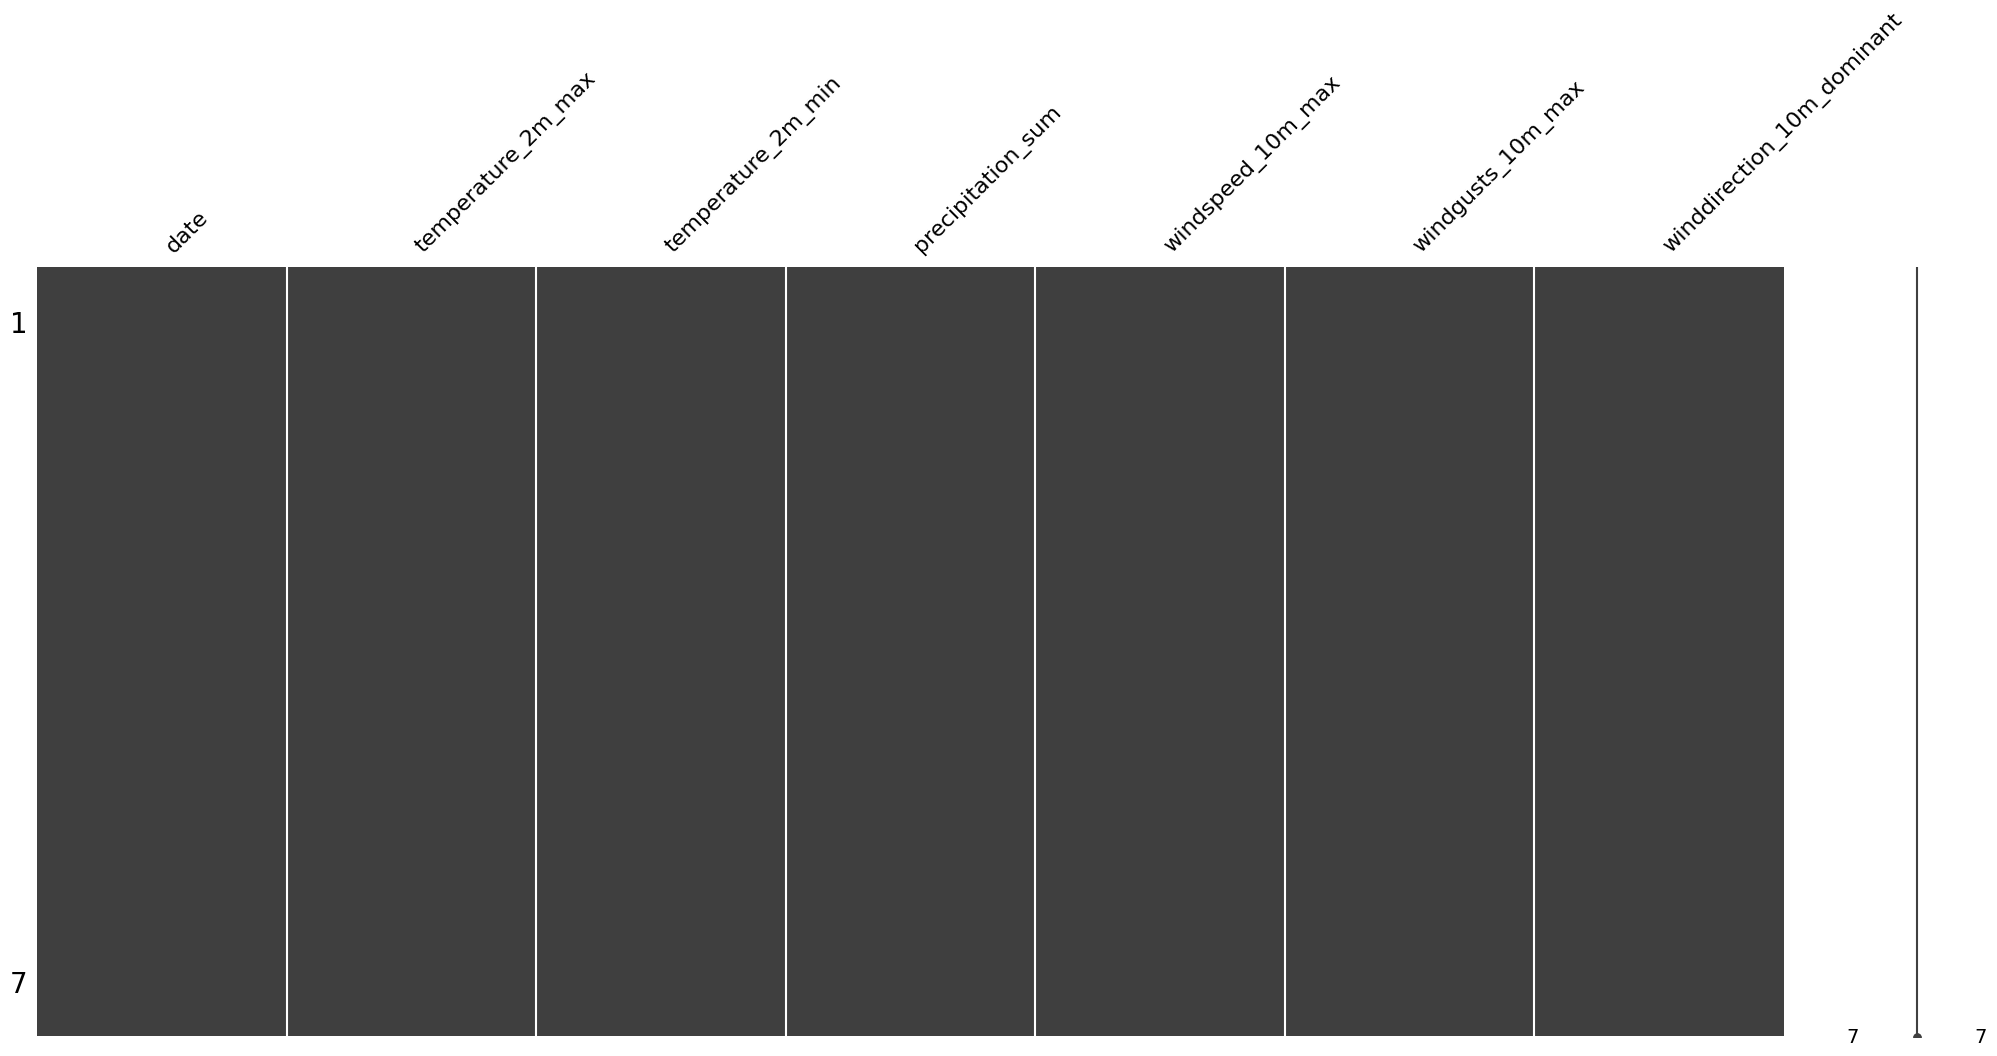

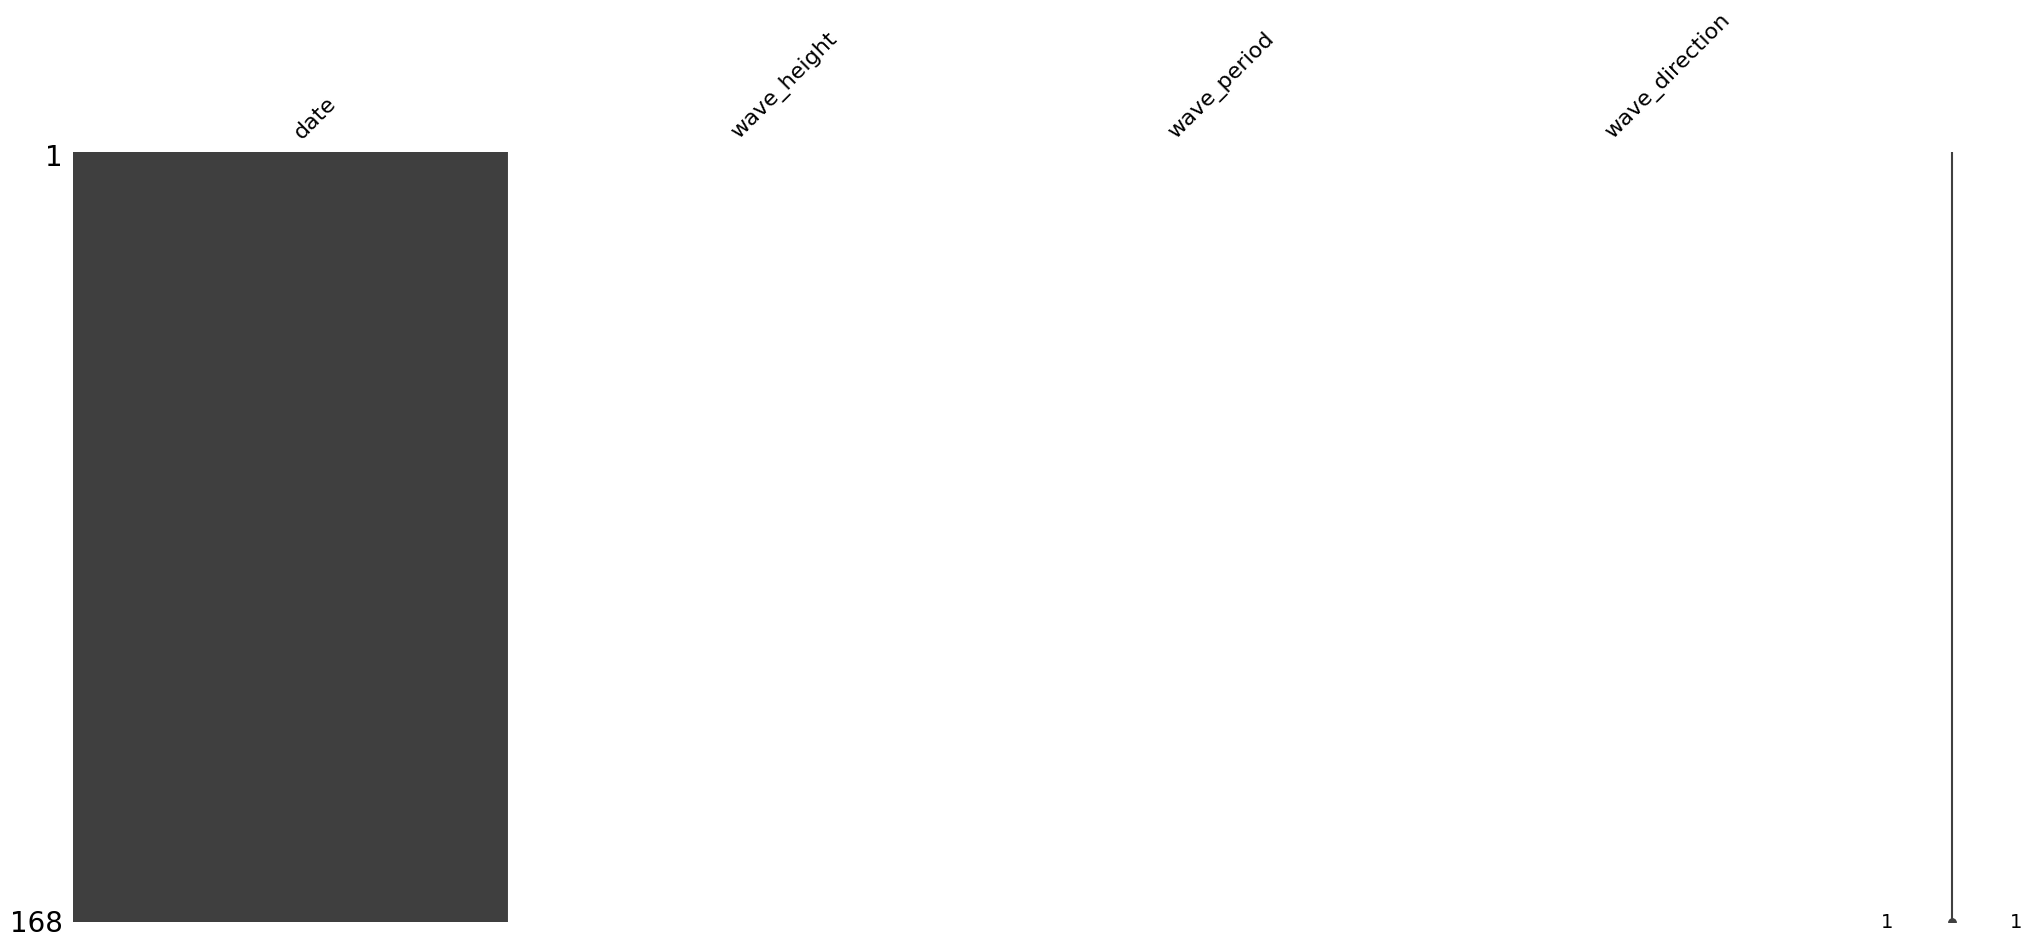

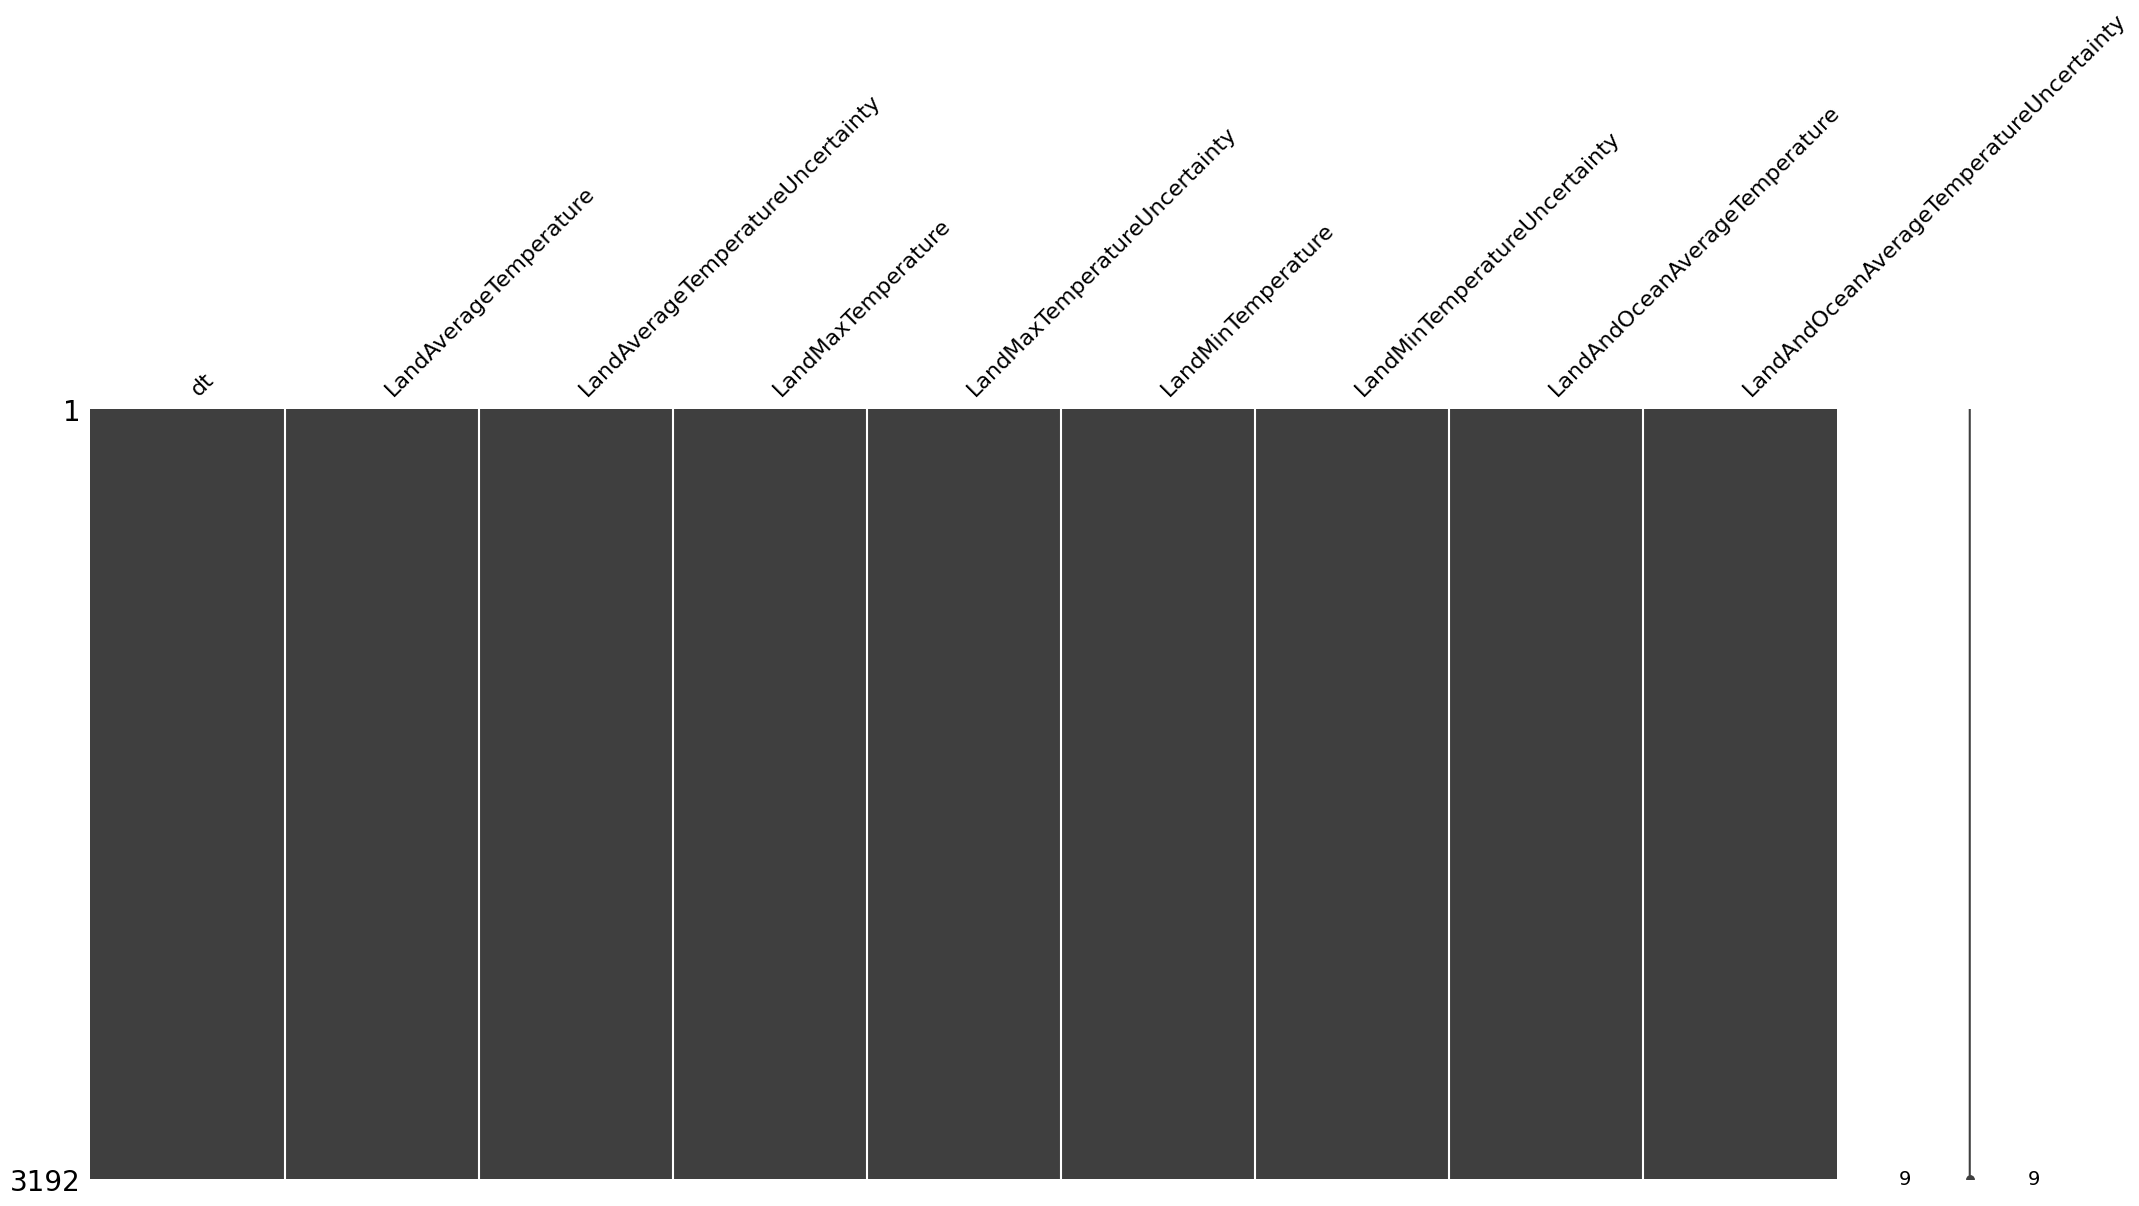

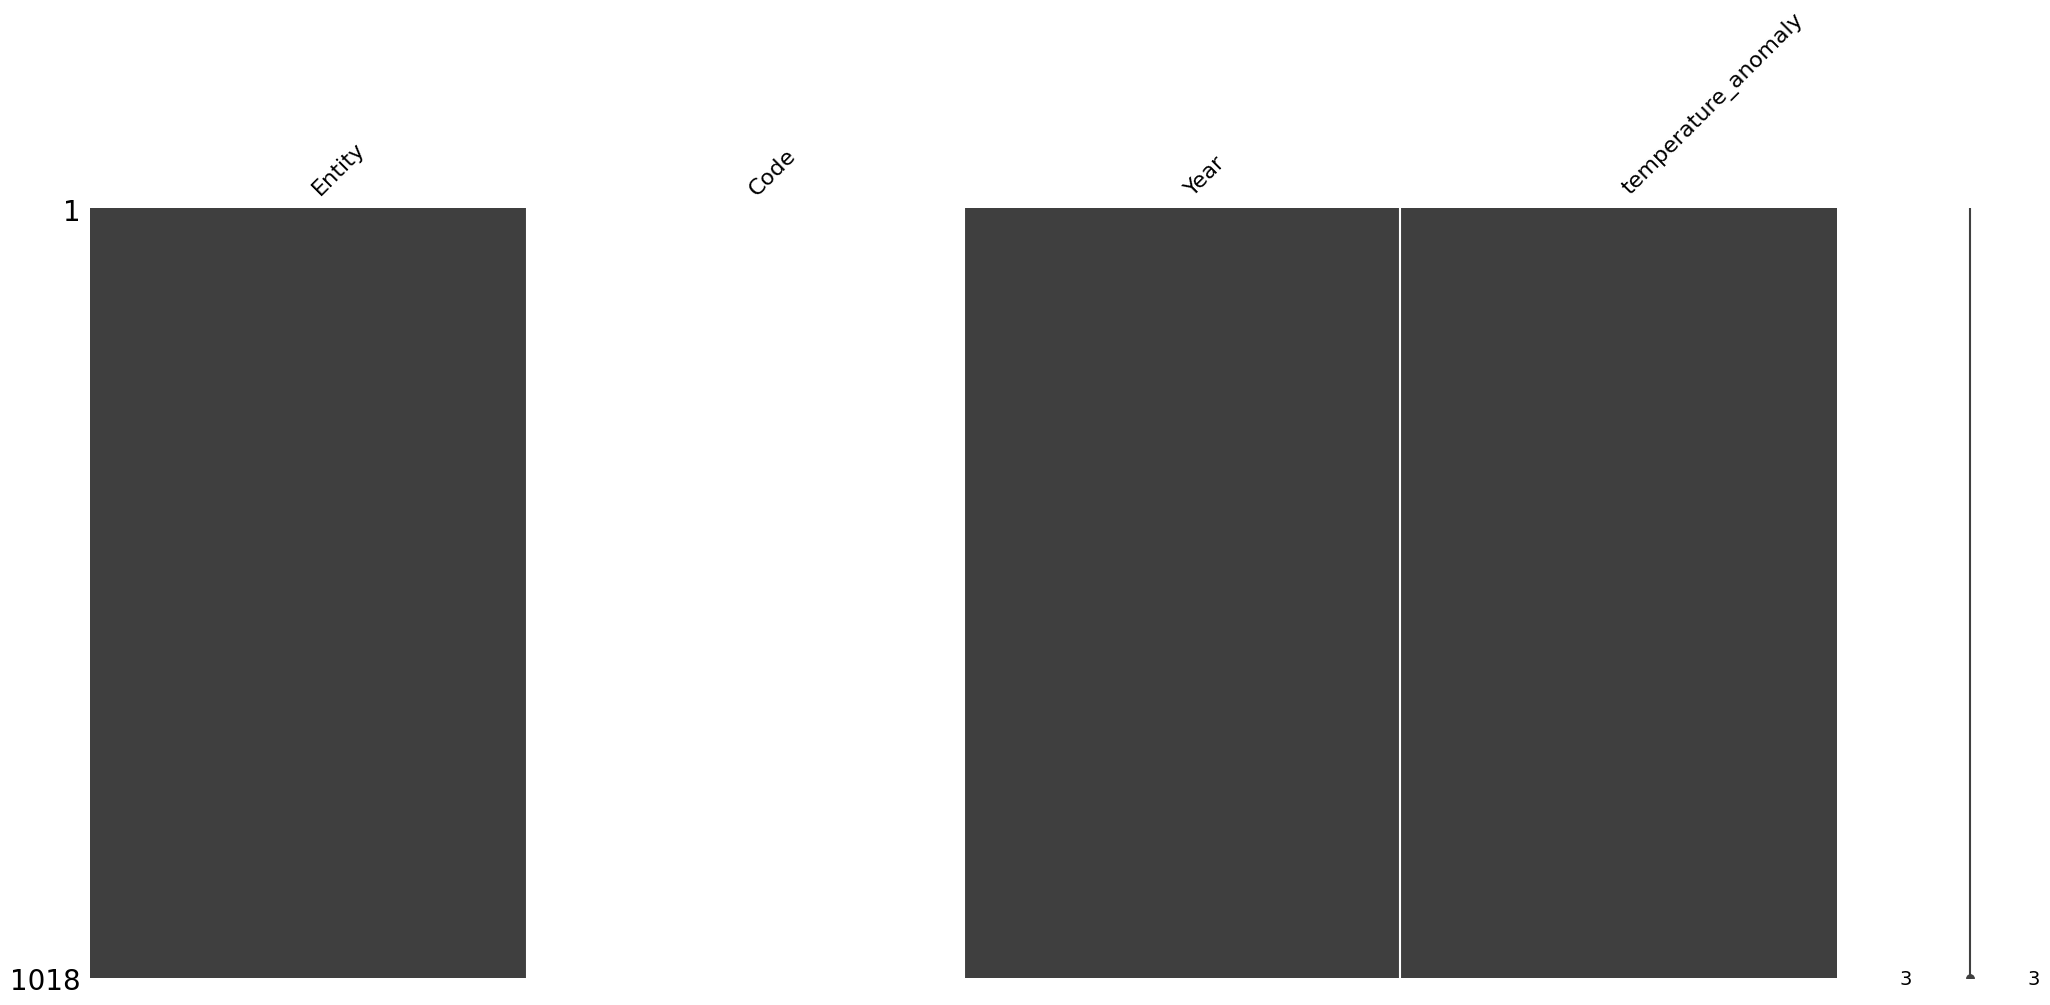

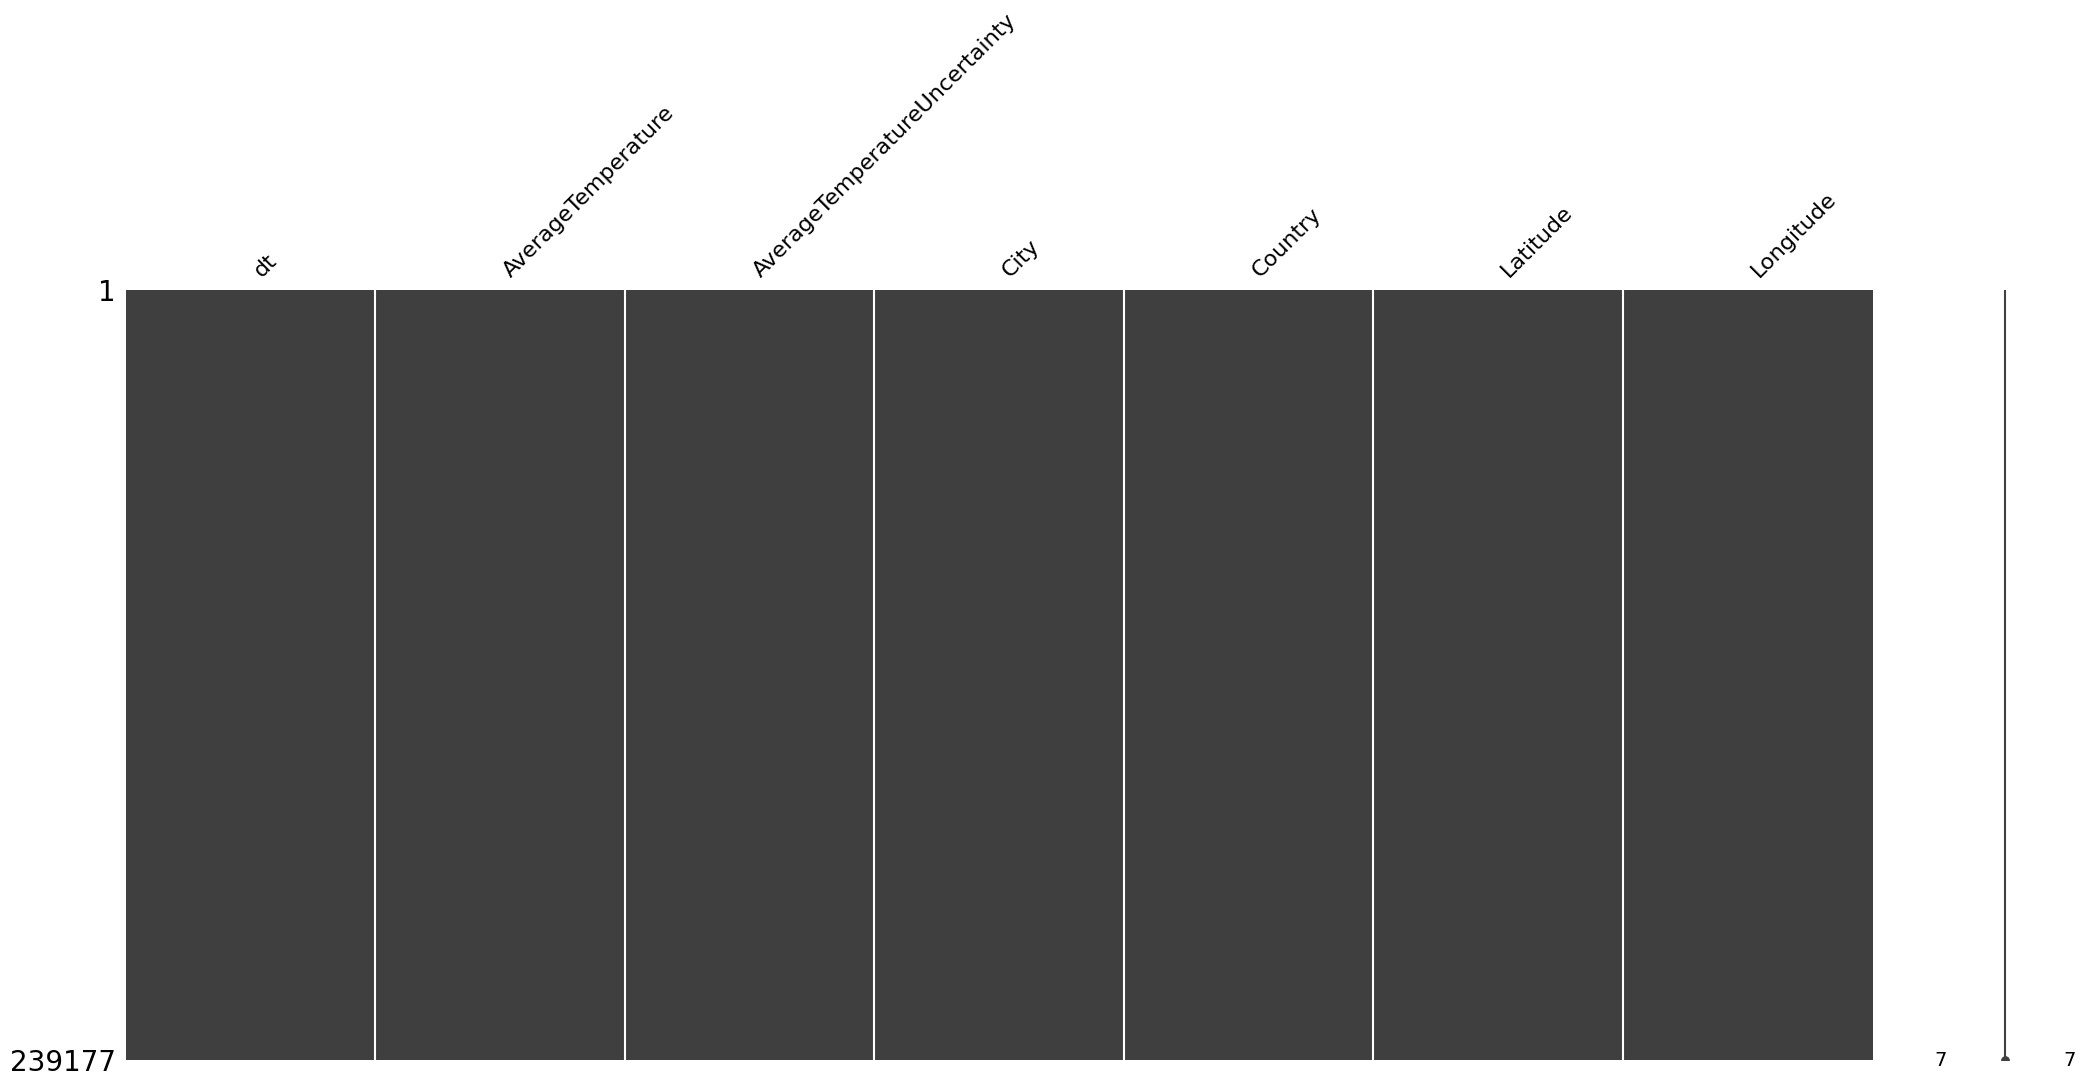

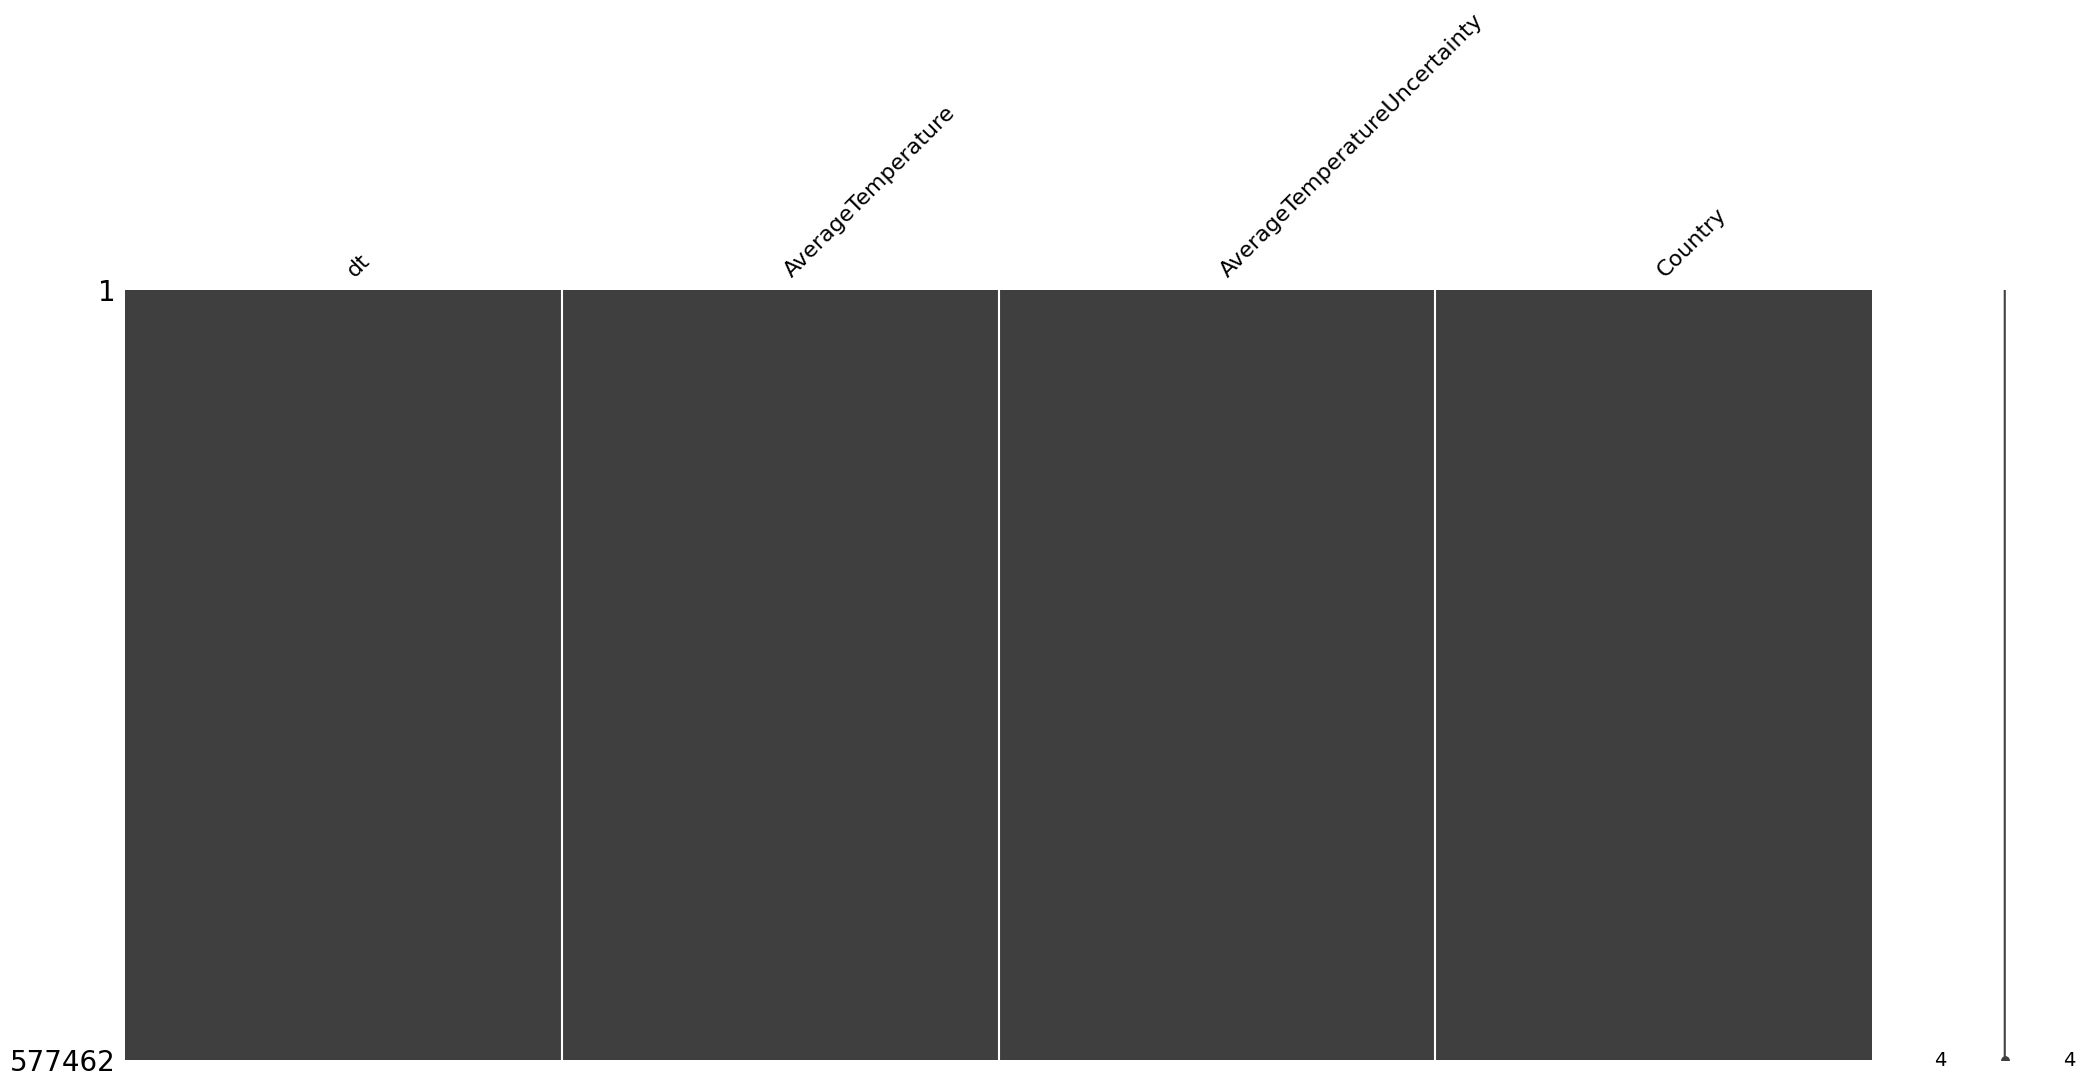

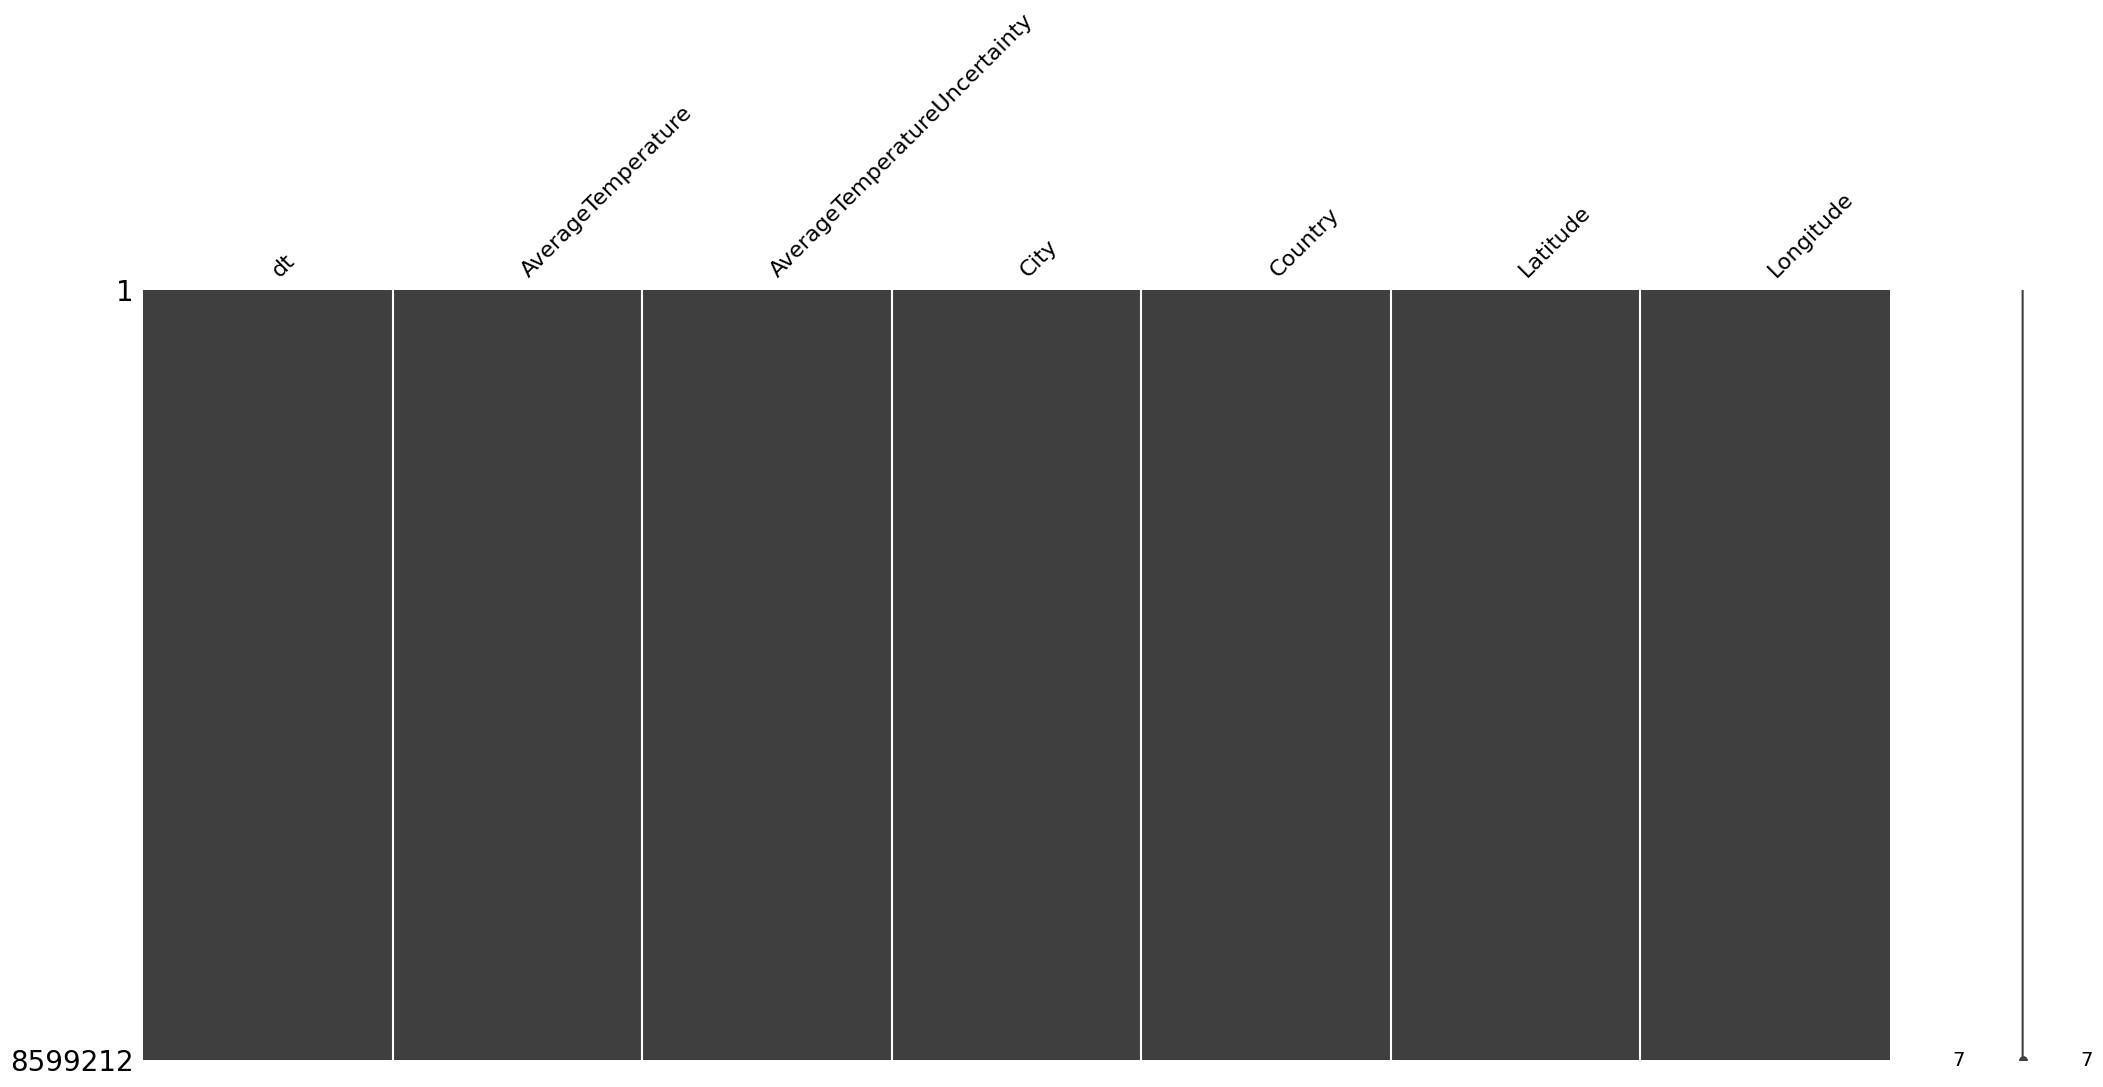

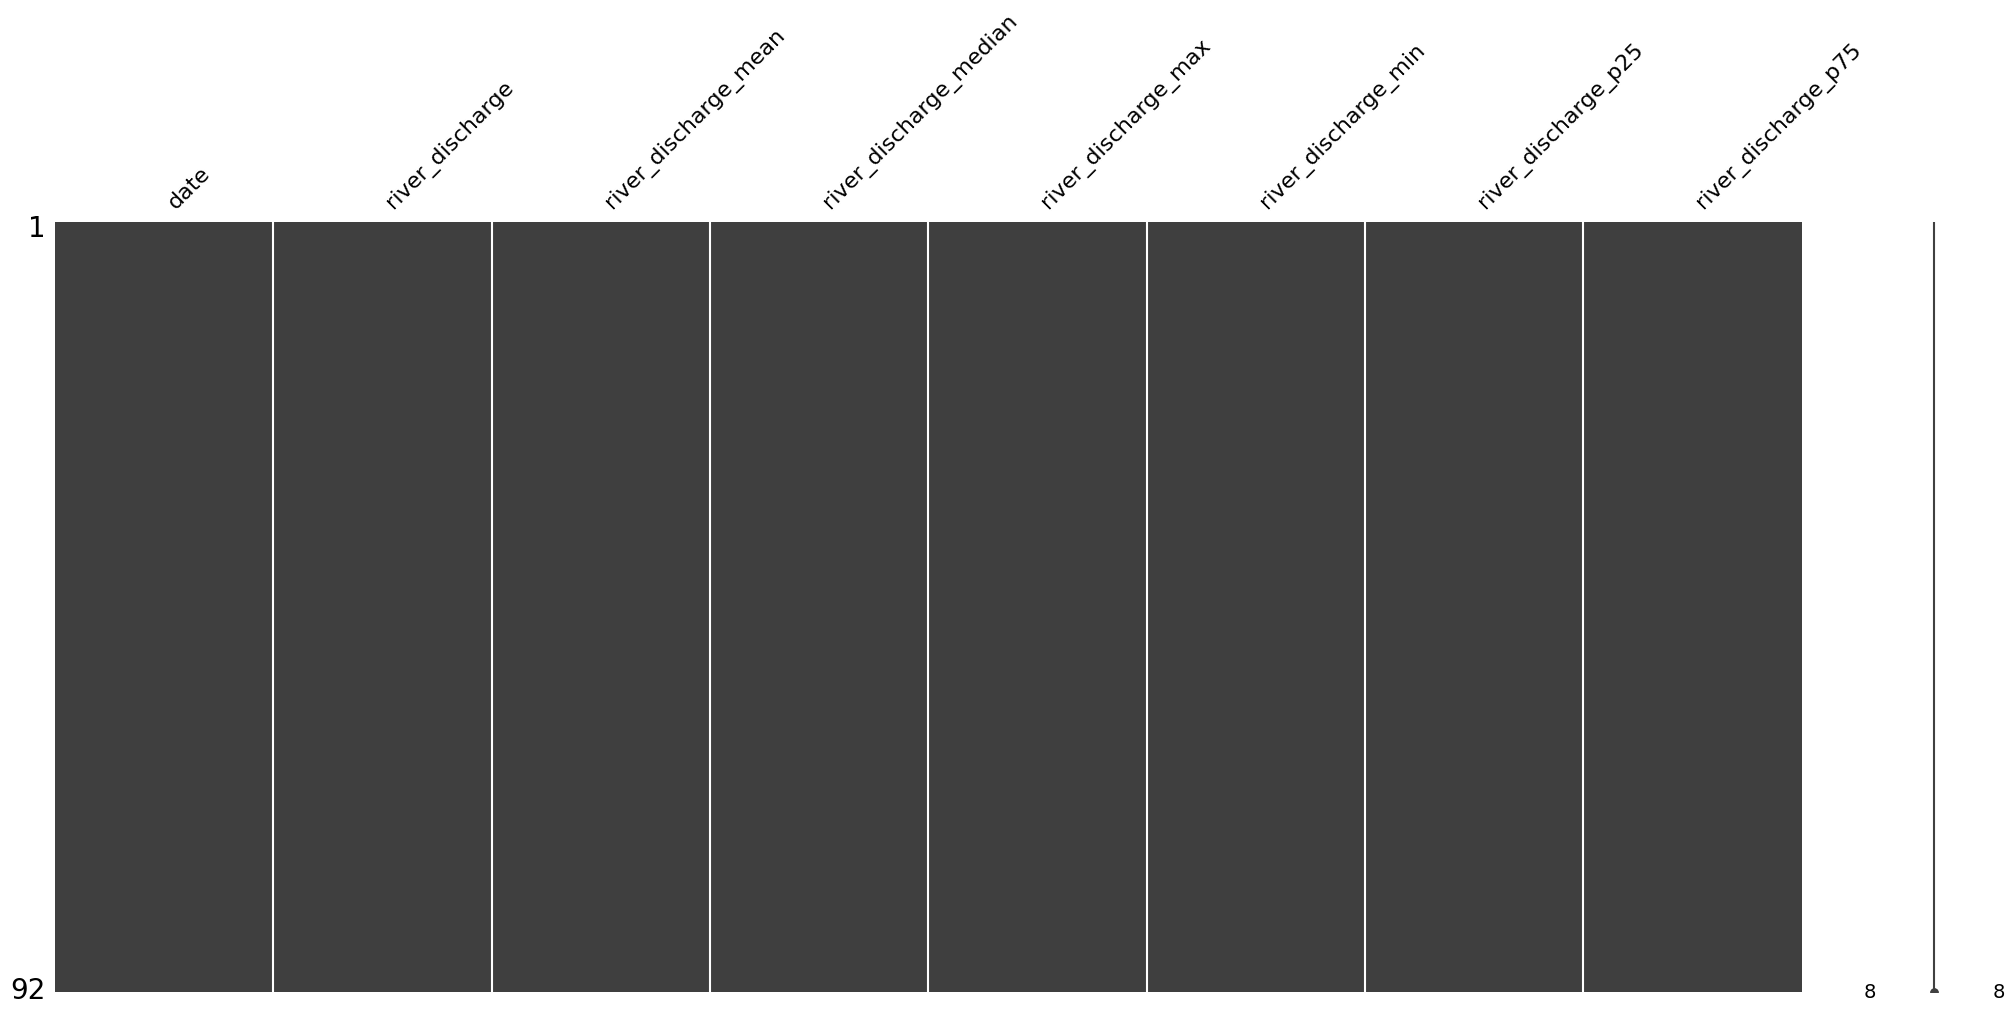

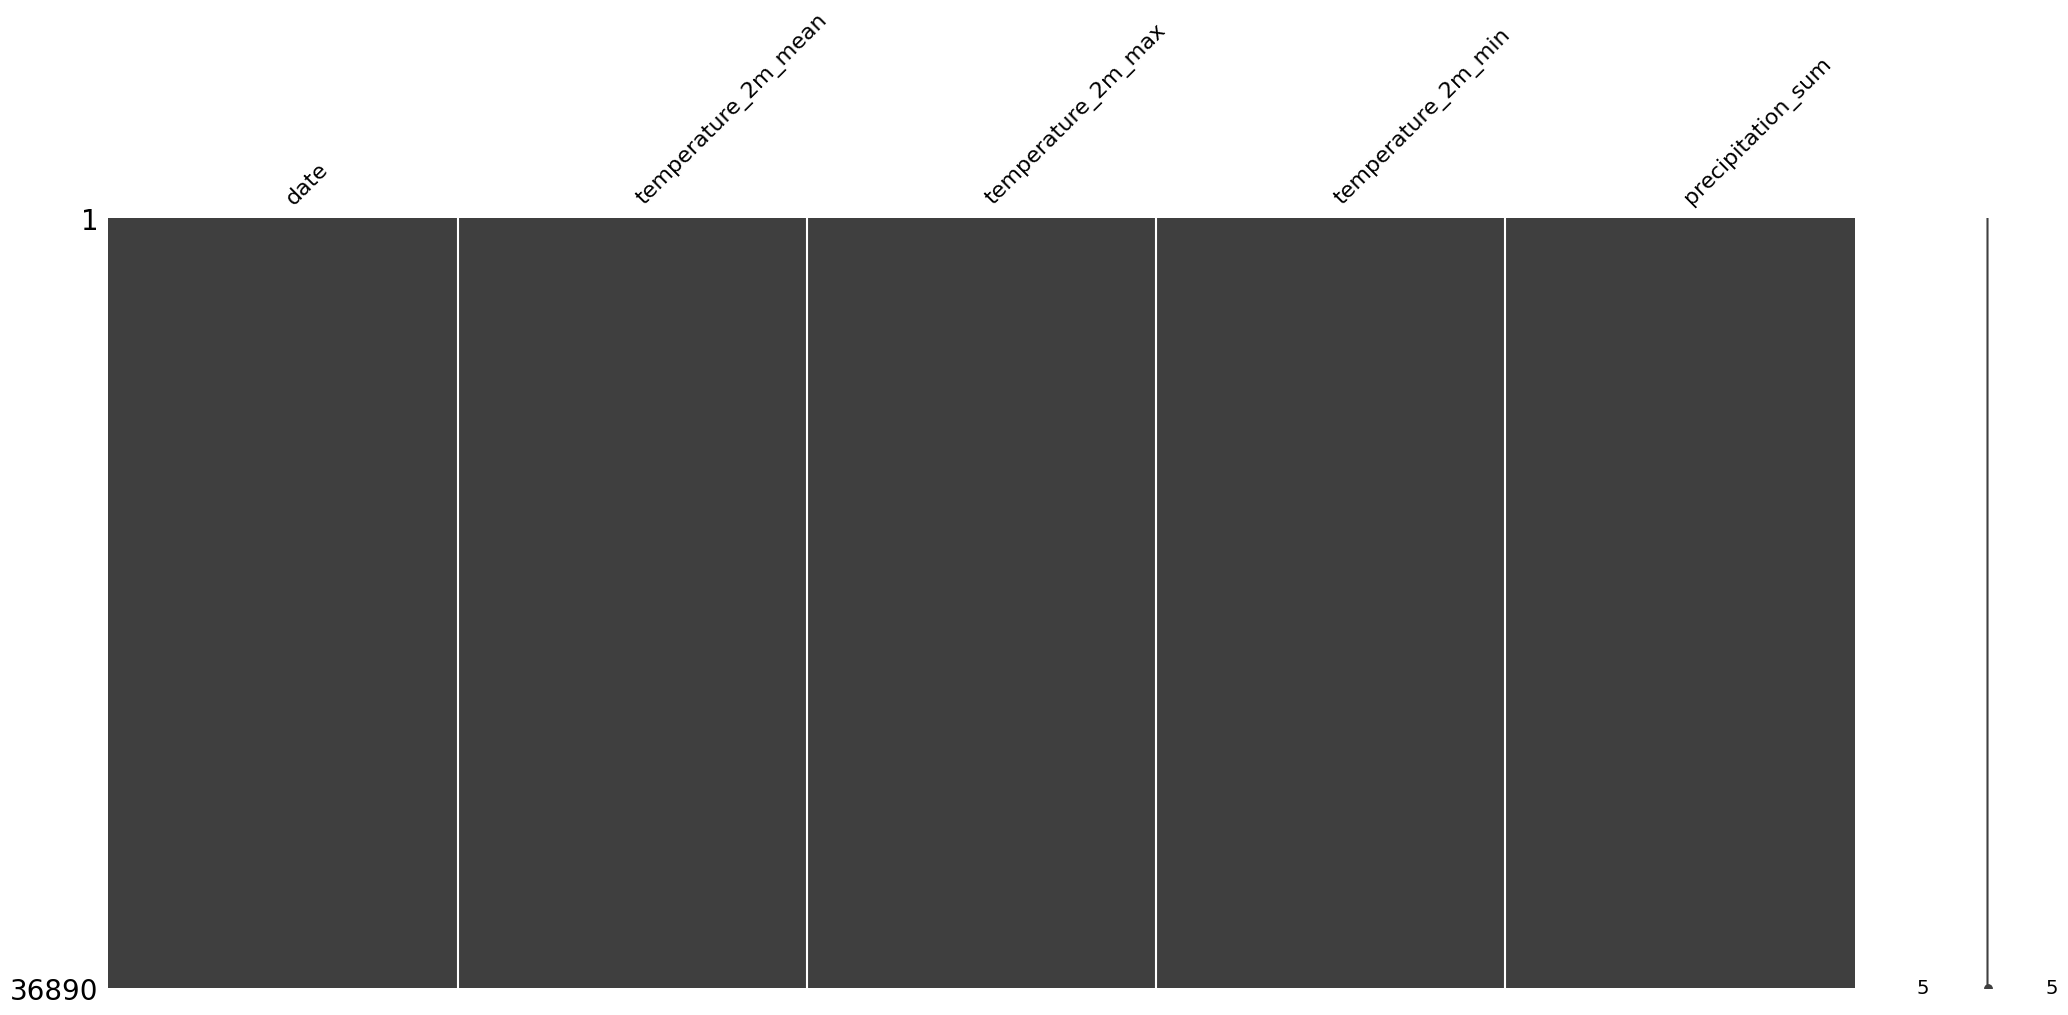

In [11]:
import missingno as msno

msno.matrix(weather_data)
msno.matrix(marine_data)
msno.matrix(global_temperatures)
msno.matrix(temperature_anomalies)
msno.matrix(land_temperatures_major_city)
msno.matrix(land_temperatures_country)
msno.matrix(land_temperatures_city)
msno.matrix(flood_data)
msno.matrix(climate_data)

In [12]:
print("Weather Data Summary Statistics:")
print(weather_data.describe())

print("\nMarine Data Summary Statistics:")
print(marine_data.describe())

print("\nGlobal Temperatures Summary Statistics:")
print(global_temperatures.describe())

print("\nTemperature Anomalies Summary Statistics:")
print(temperature_anomalies.describe())

print("\nLand Temperatures Major City Summary Statistics:")
print(land_temperatures_major_city.describe())

print("\nLand Temperatures Country Summary Statistics:")
print(land_temperatures_country.describe())

print("\nLand Temperatures City Summary Statistics:")
print(land_temperatures_city.describe())

print("\nFlood Data Summary Statistics:")
print(flood_data.describe())

print("\nClimate Data Summary Statistics:")
print(climate_data.describe())


Weather Data Summary Statistics:
       temperature_2m_max  temperature_2m_min  precipitation_sum  \
count            7.000000            7.000000           7.000000   
mean             2.442857           -1.550000           1.342857   
std              1.812096            2.888916           2.944971   
min             -0.000000           -7.500000           0.000000   
25%              1.625000           -1.950000           0.000000   
50%              2.000000           -0.300000           0.000000   
75%              3.075000            0.000000           0.750000   
max              5.700000            0.850000           7.899999   

       windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  
count           7.000000           7.000000                    7.000000  
mean           12.026388          24.788571                  148.544736  
std             8.933728          12.645225                   82.841498  
min             2.902413          11.520000               

<Figure size 1200x800 with 0 Axes>

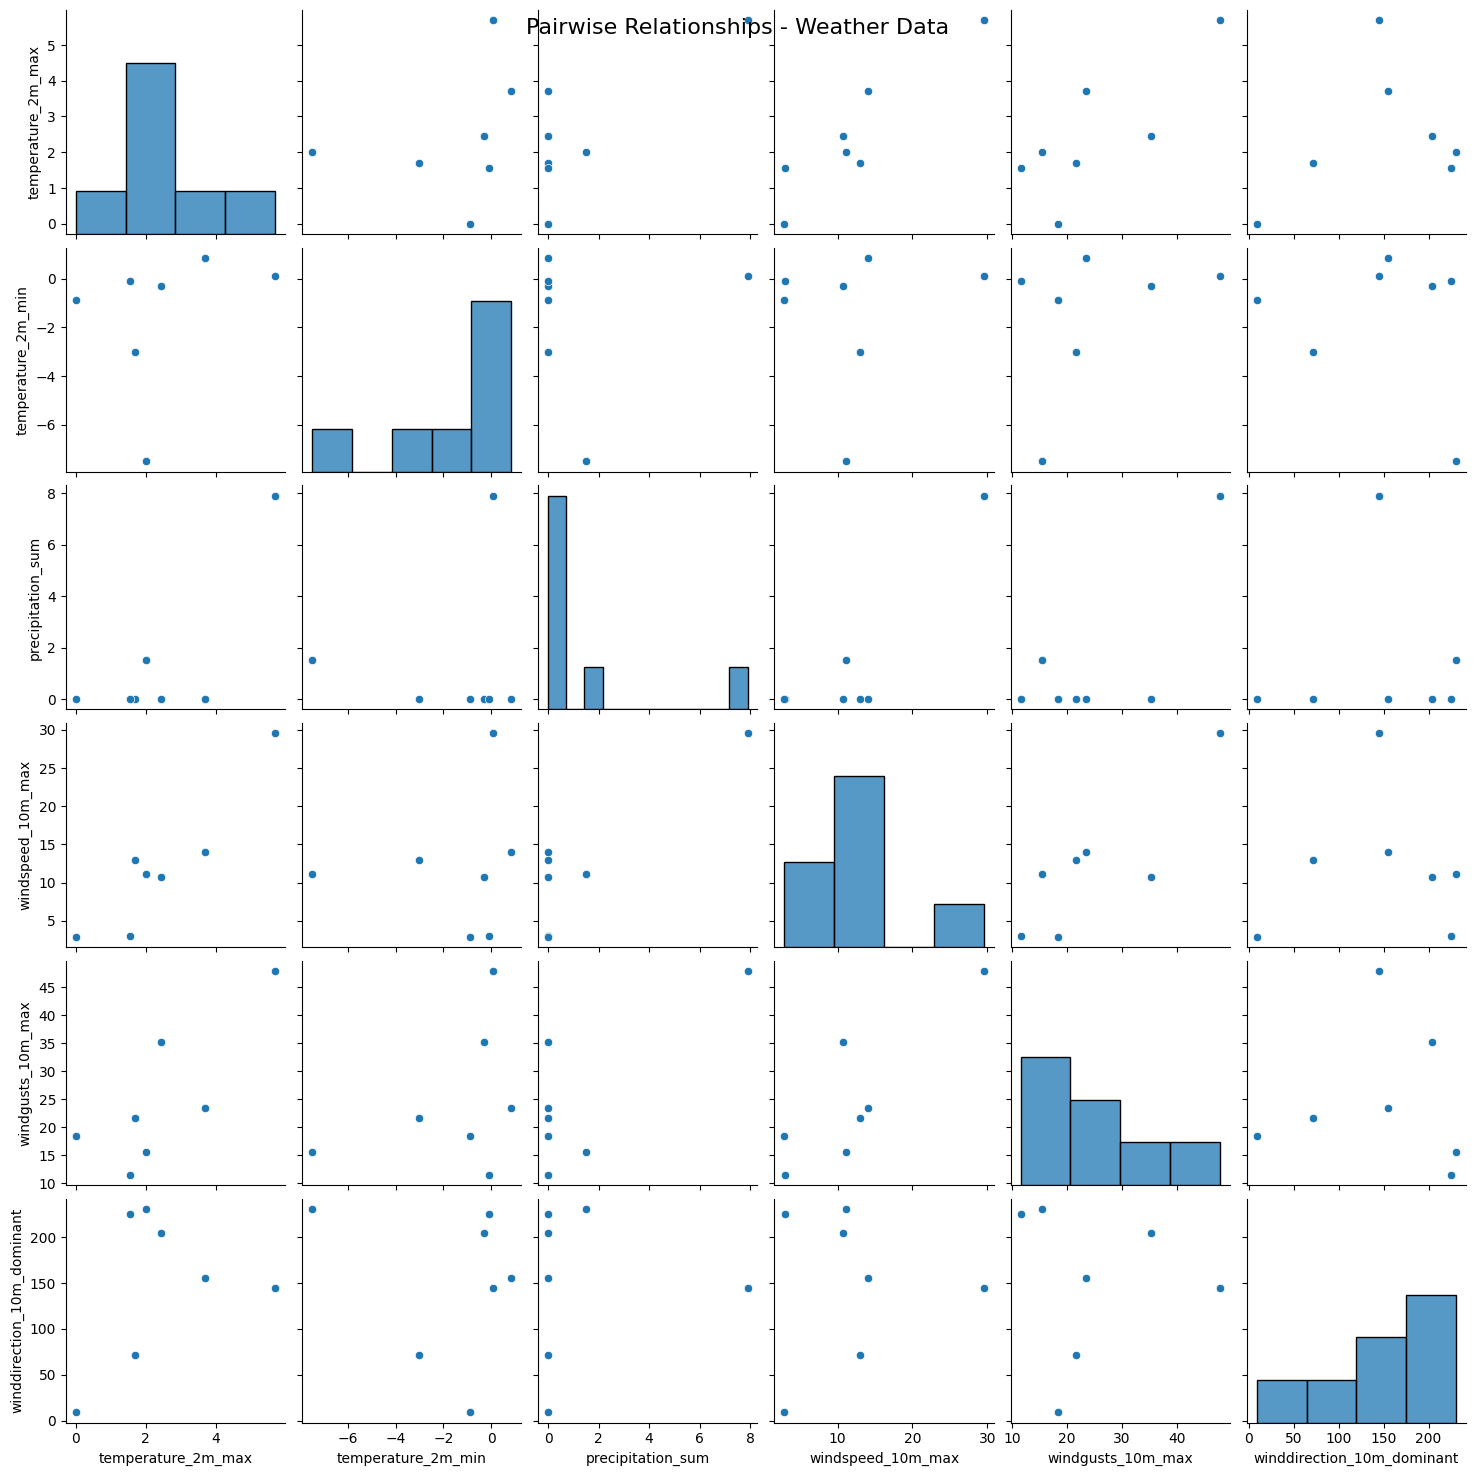

<Figure size 1200x800 with 0 Axes>

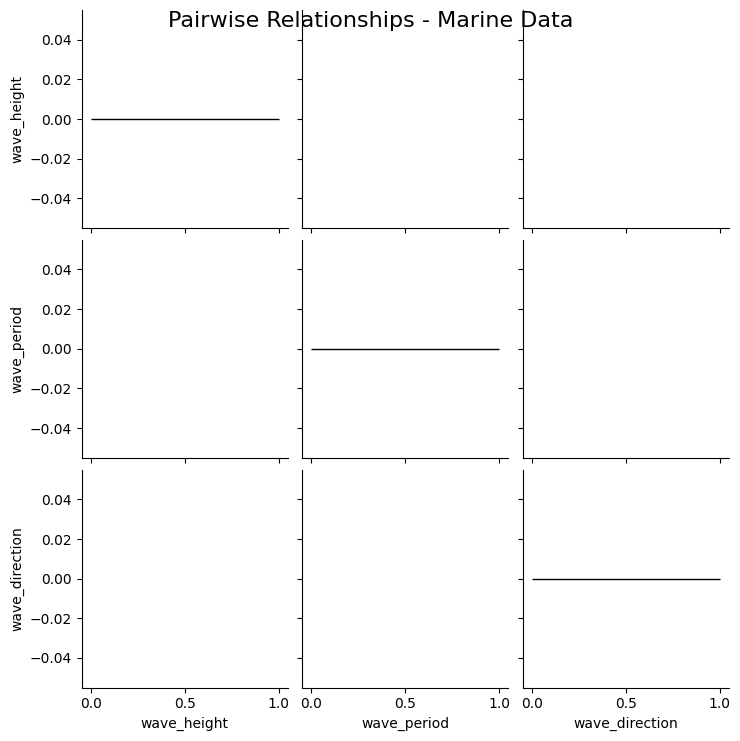

<Figure size 1200x800 with 0 Axes>

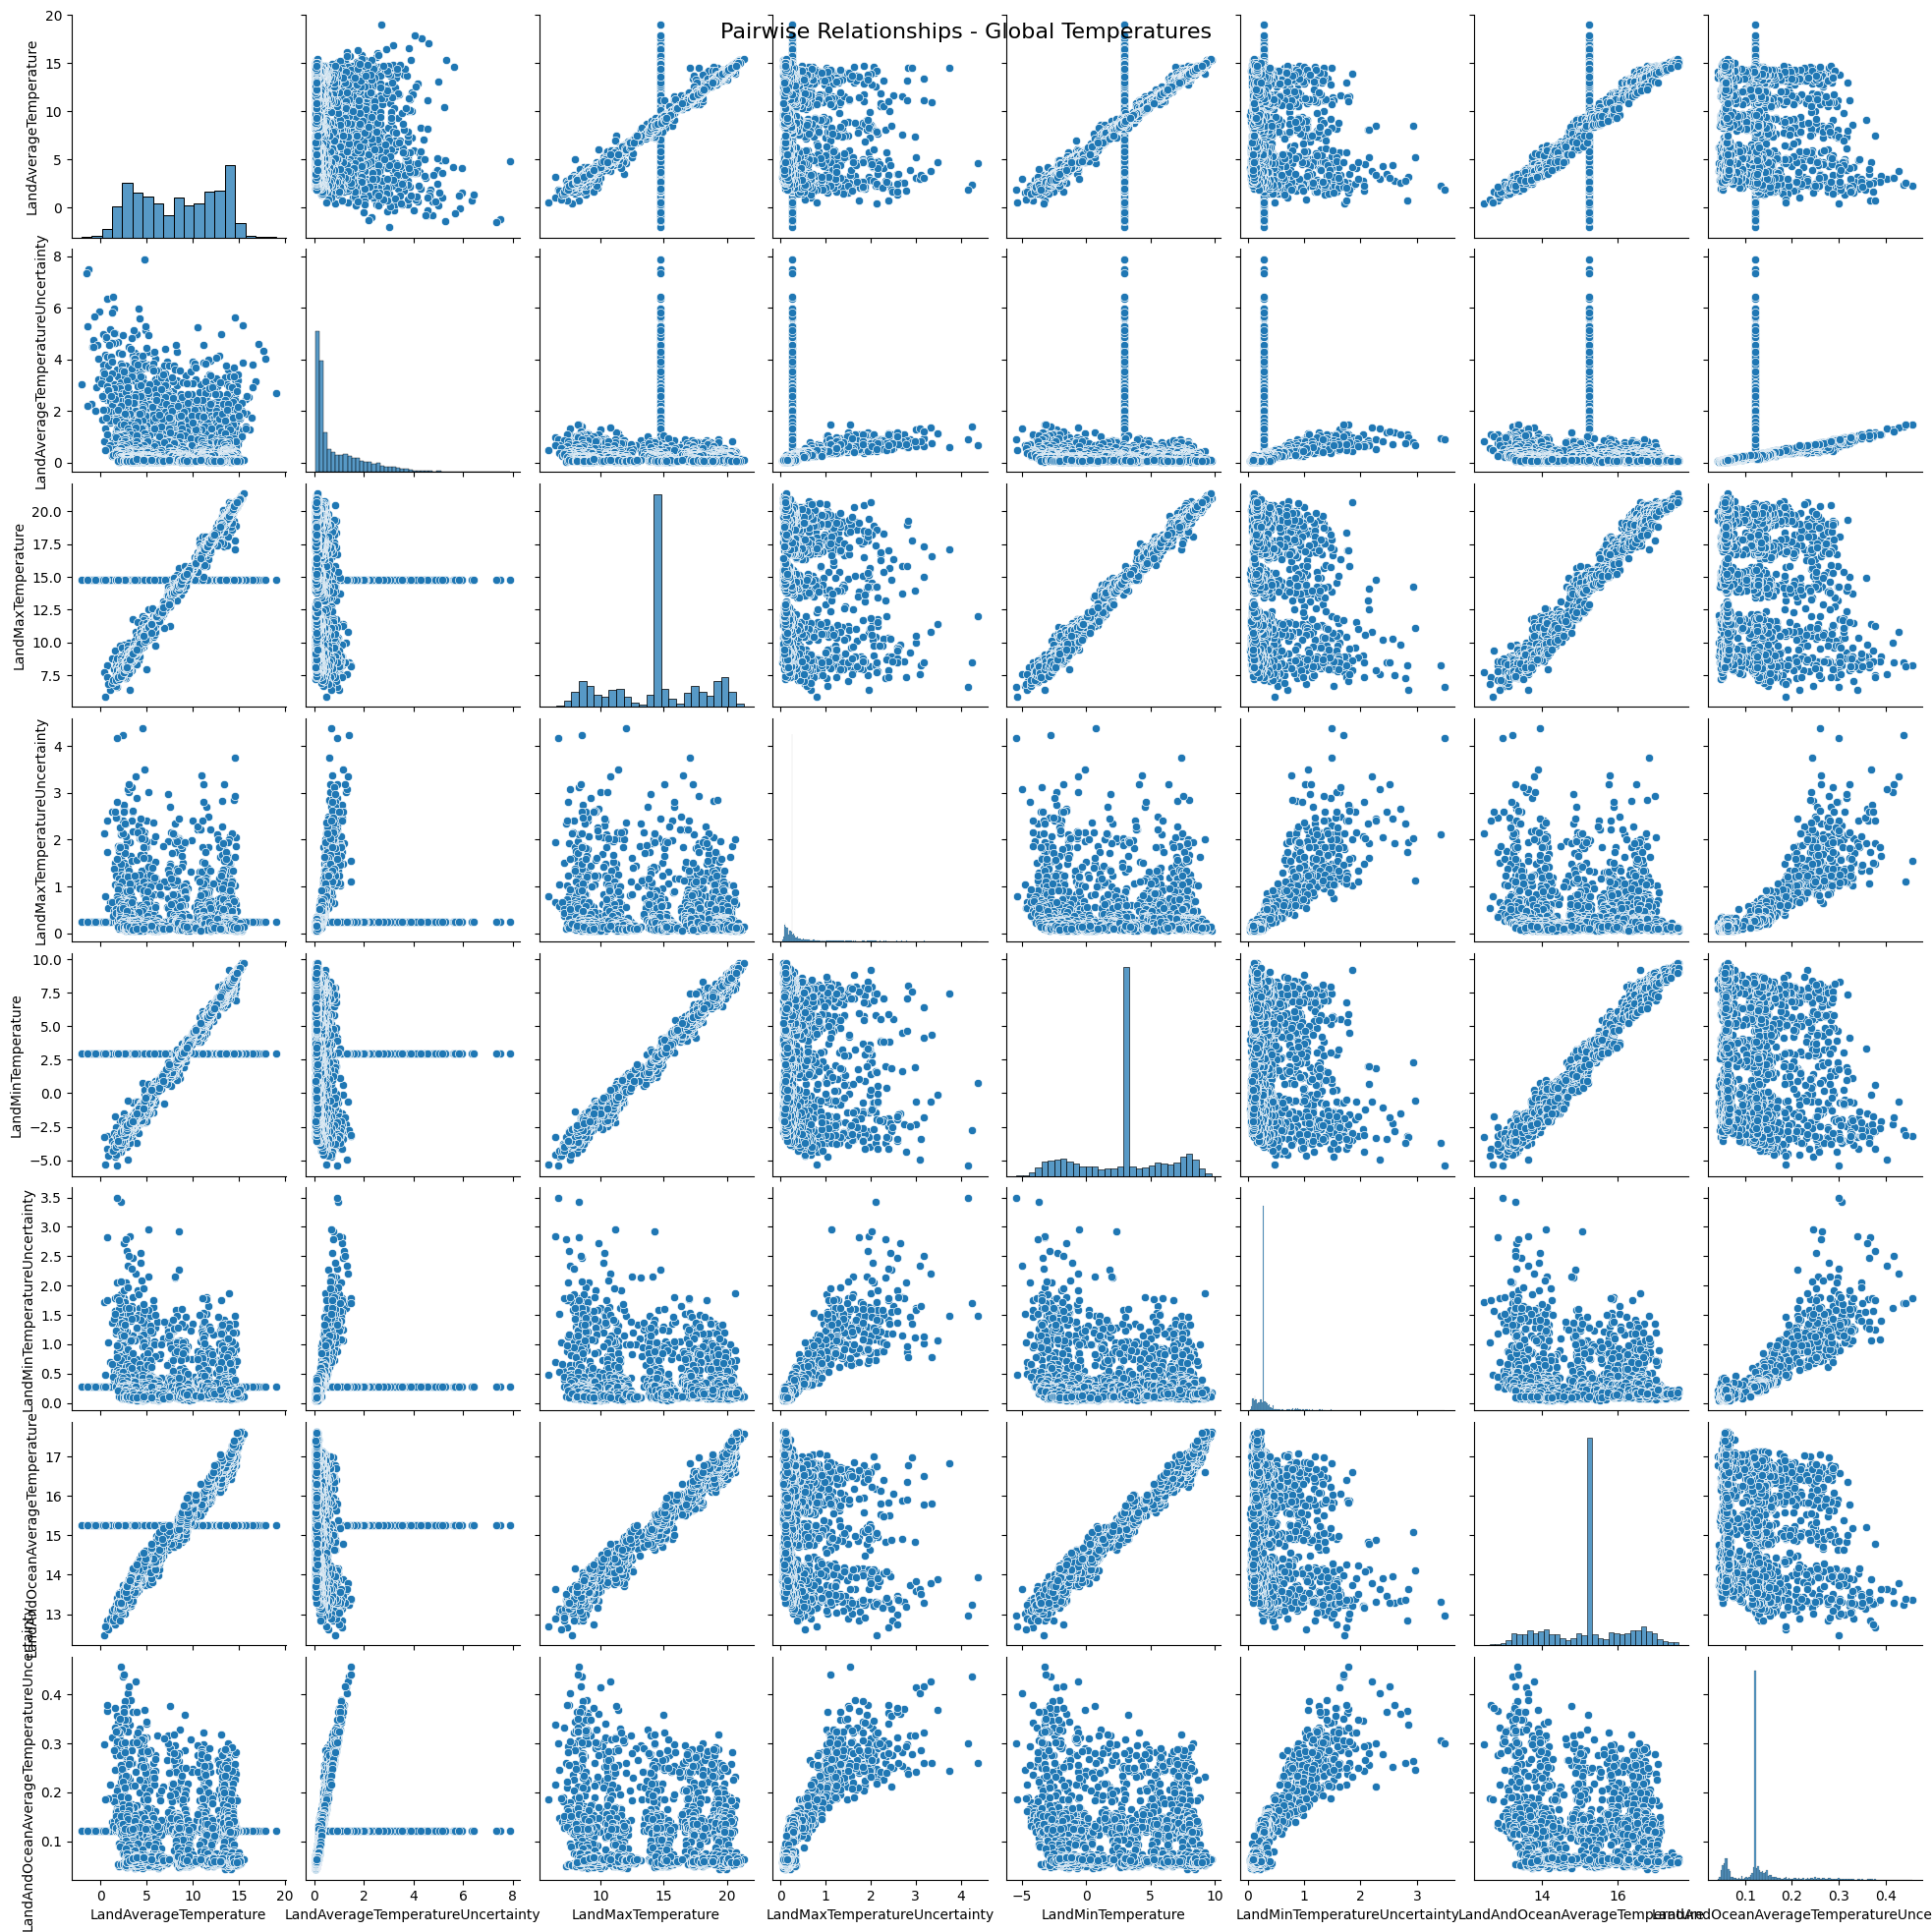

<Figure size 1200x800 with 0 Axes>

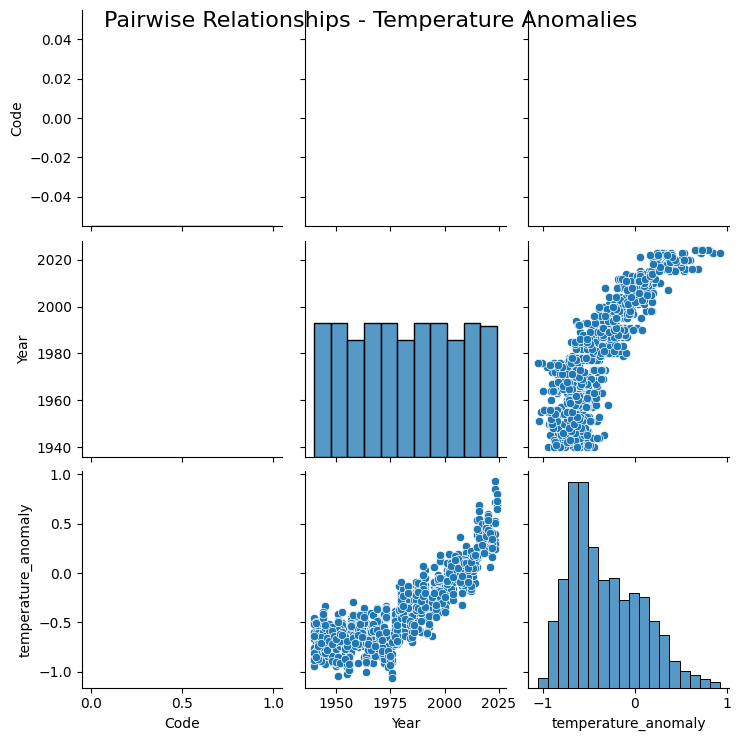

<Figure size 1200x800 with 0 Axes>

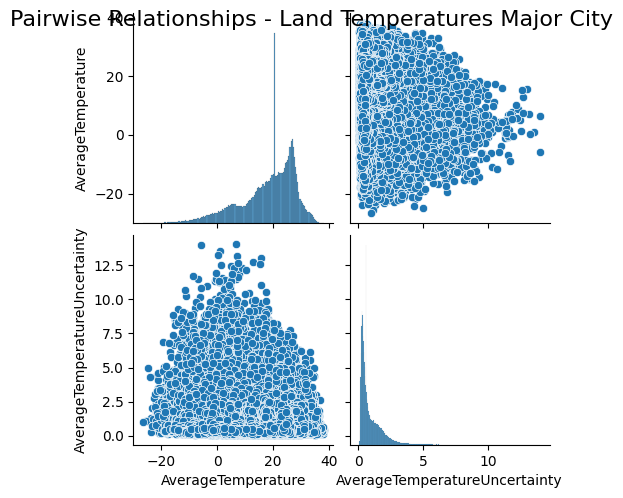

<Figure size 1200x800 with 0 Axes>

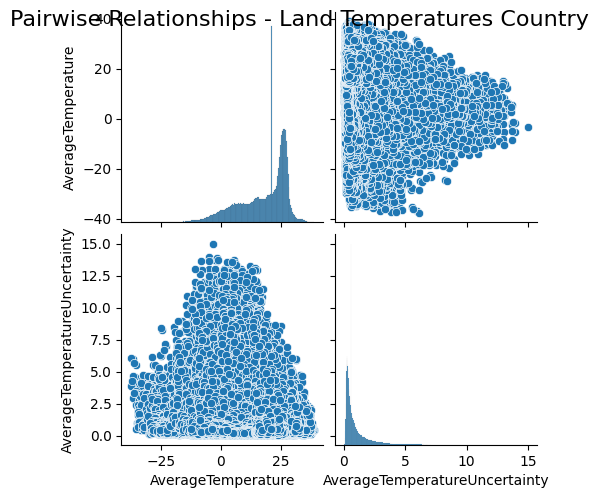

<Figure size 1200x800 with 0 Axes>

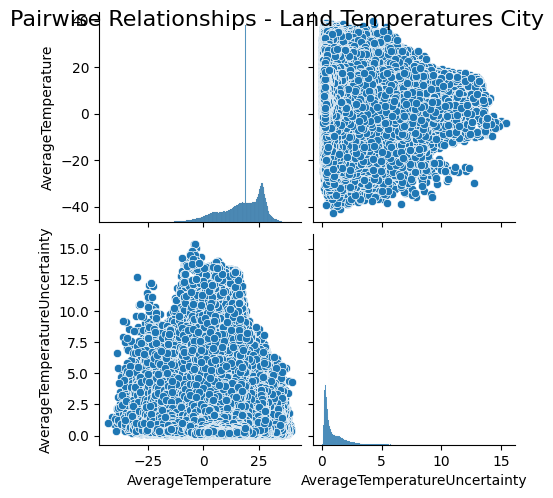

<Figure size 1200x800 with 0 Axes>

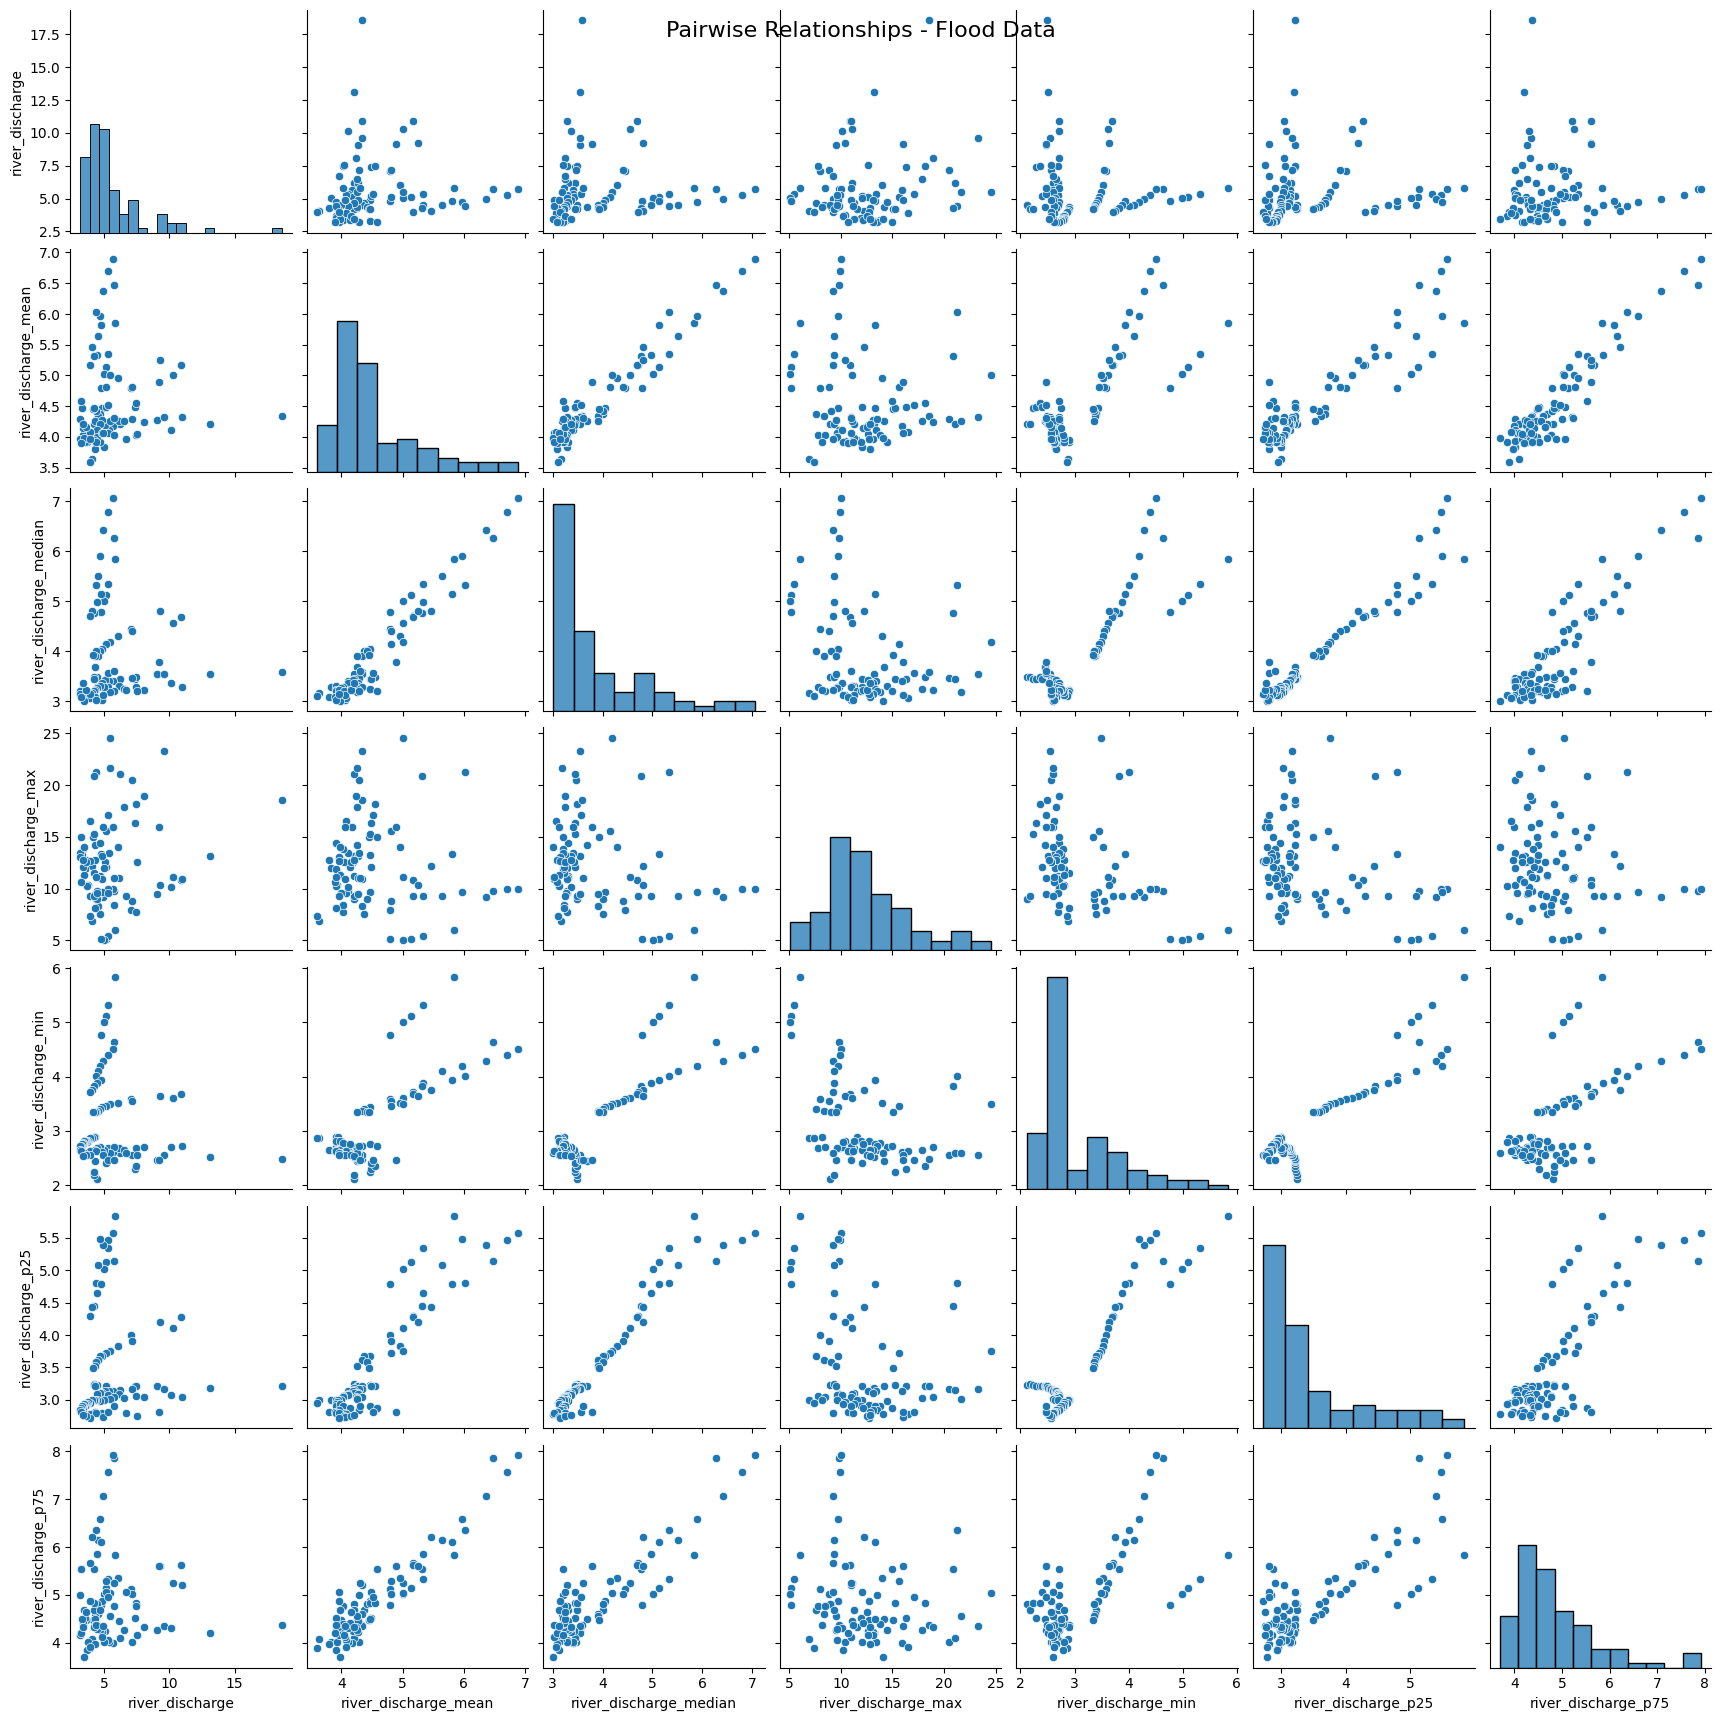

<Figure size 1200x800 with 0 Axes>

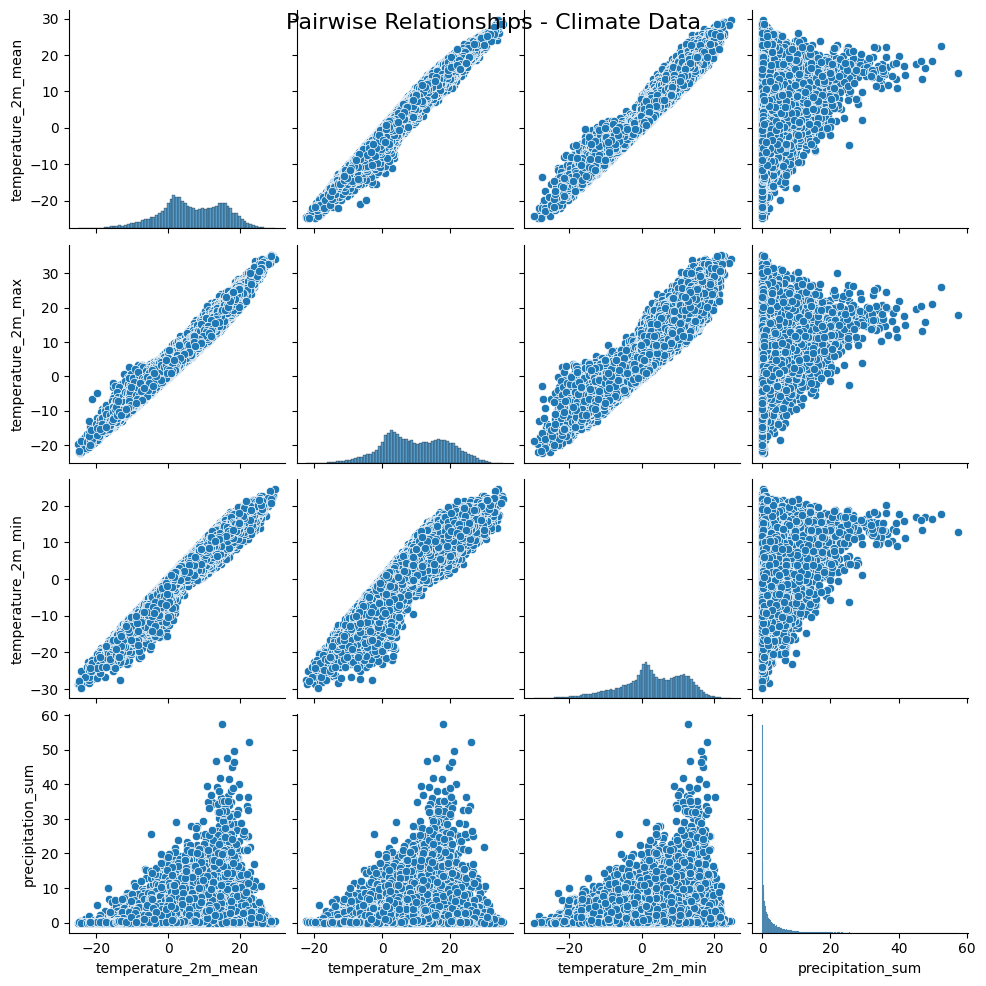

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of datasets
datasets = {
    "Weather Data": weather_data,
    "Marine Data": marine_data,
    "Global Temperatures": global_temperatures,
    "Temperature Anomalies": temperature_anomalies,
    "Land Temperatures Major City": land_temperatures_major_city,
    "Land Temperatures Country": land_temperatures_country,
    "Land Temperatures City": land_temperatures_city,
    "Flood Data": flood_data,
    "Climate Data": climate_data
}

# Creating pairplots for each dataset
for name, data in datasets.items():
    # Select only numerical columns for pairplot
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Skip if there are no numerical columns
    if numerical_data.empty:
        print(f"No numerical columns found in {name} for pairplot.")
        continue
    
    # Creating pairplot
    plt.figure(figsize=(12, 8))
    sns.pairplot(numerical_data)
    plt.suptitle(f'Pairwise Relationships - {name}', size=16)
    plt.show()


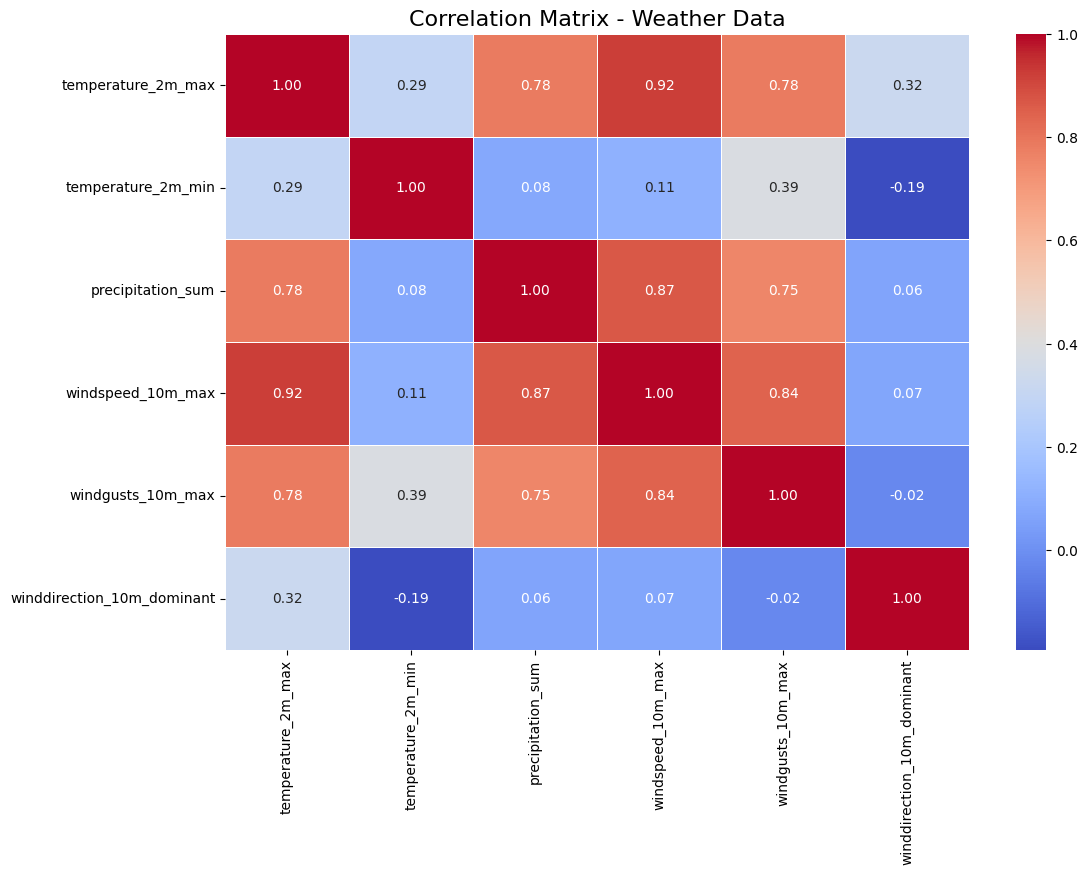

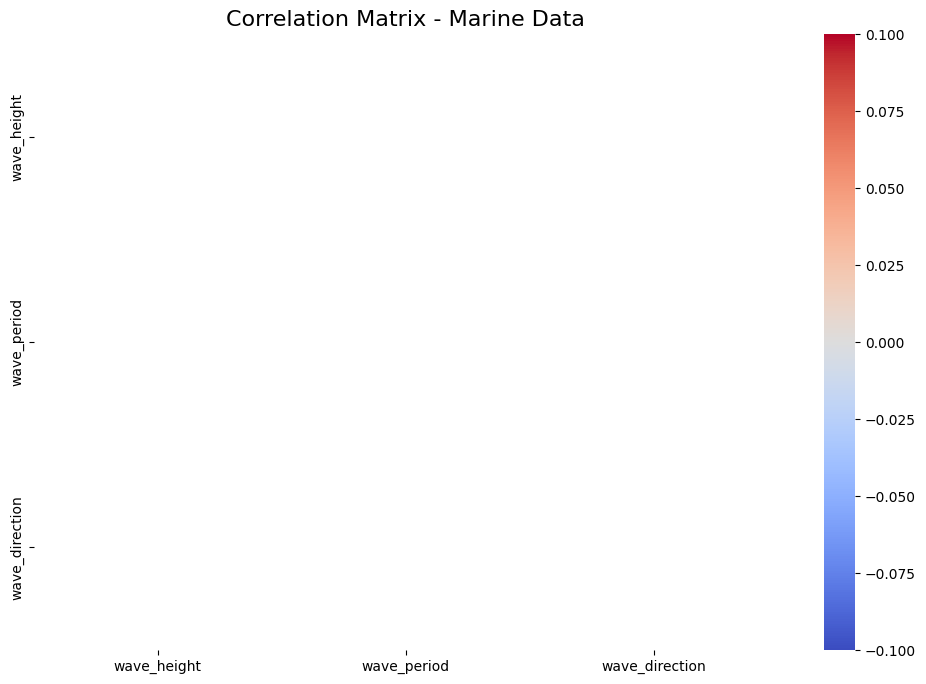

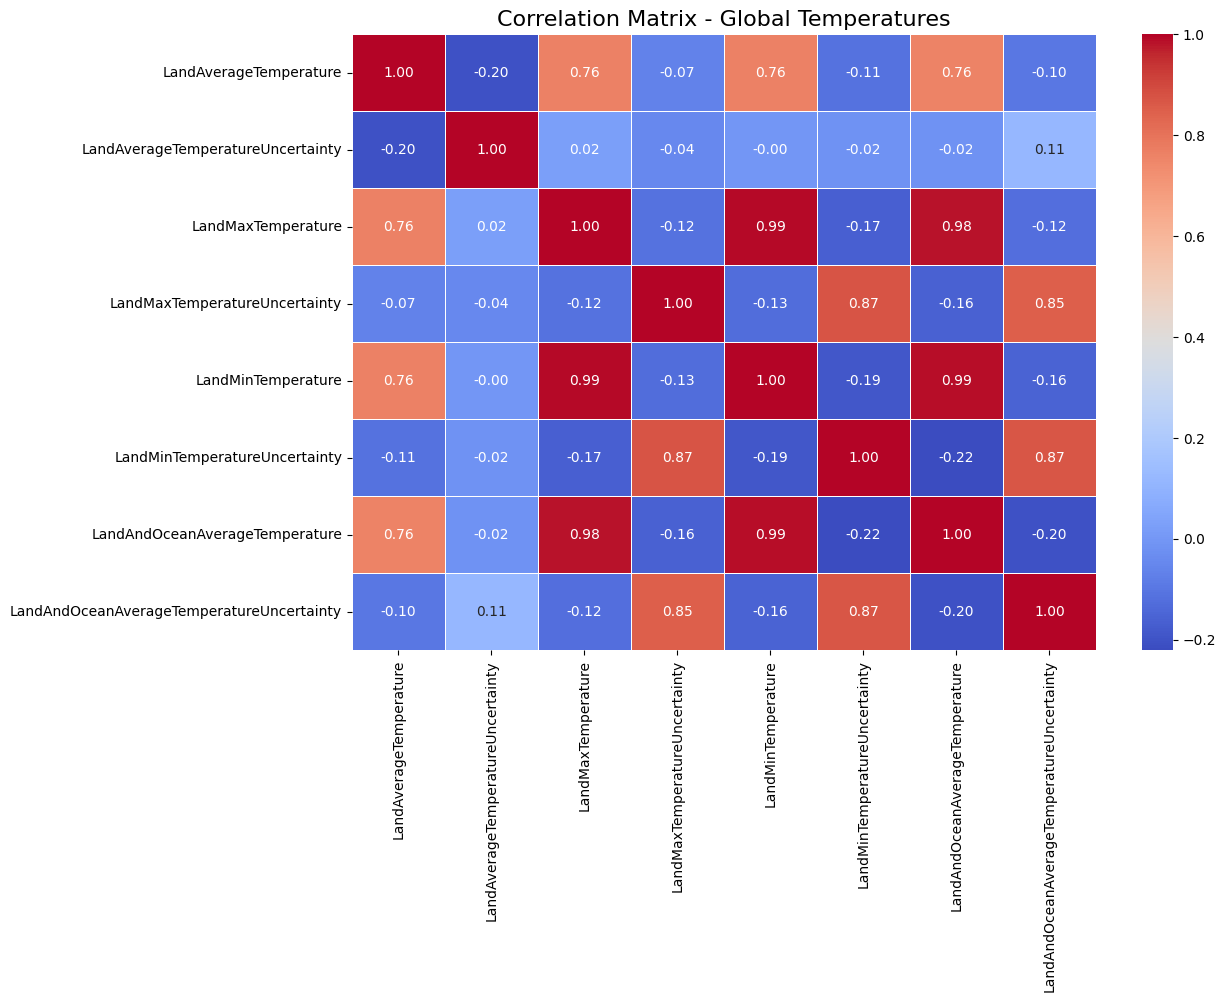

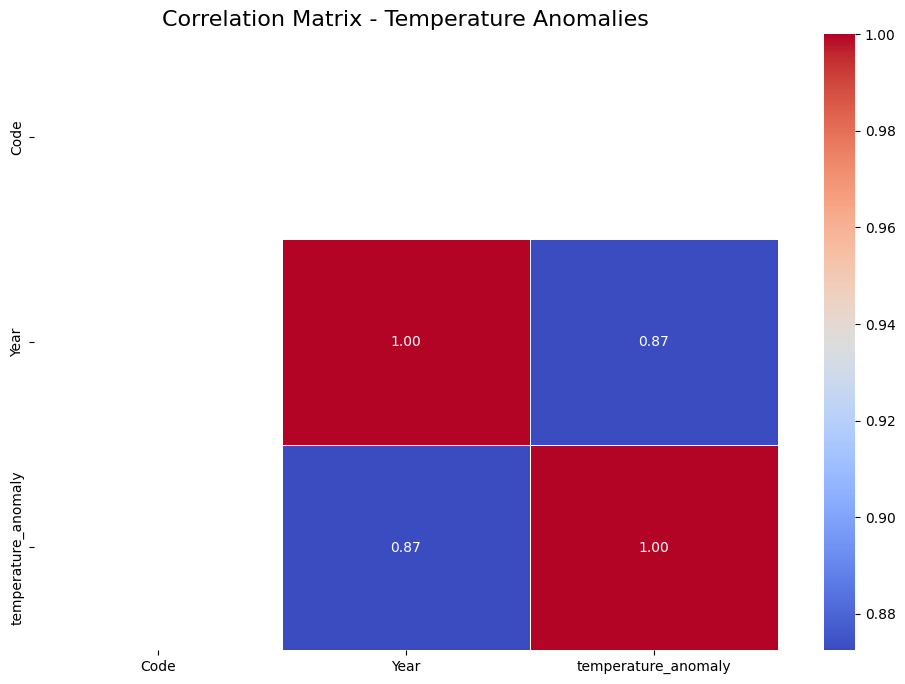

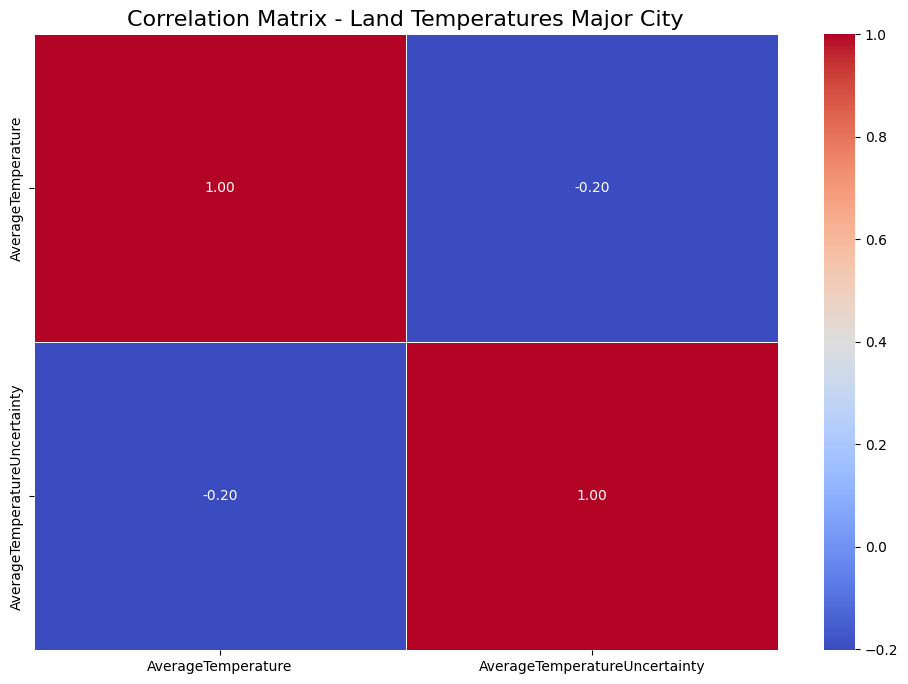

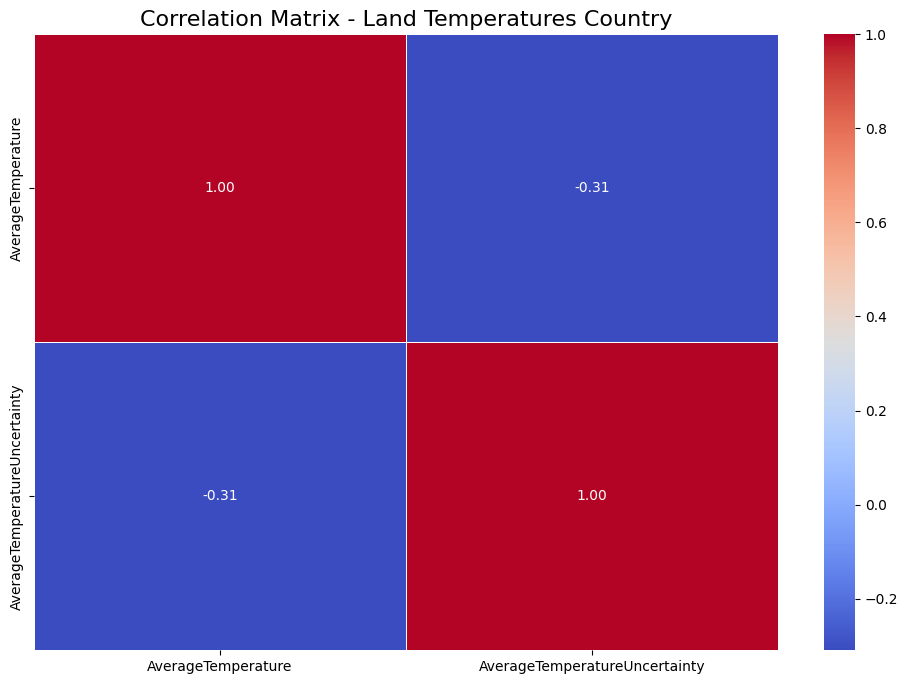

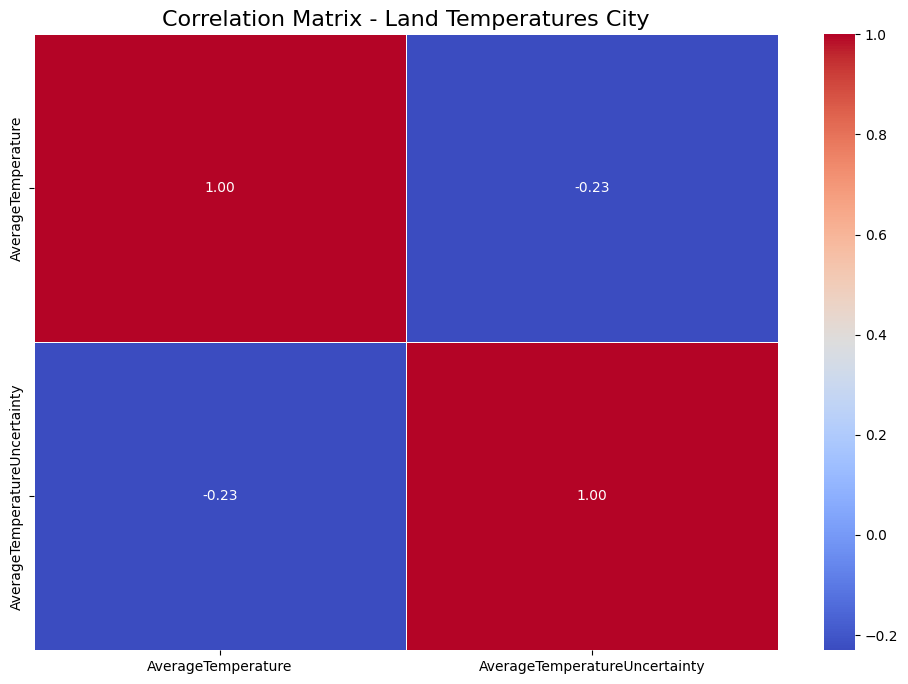

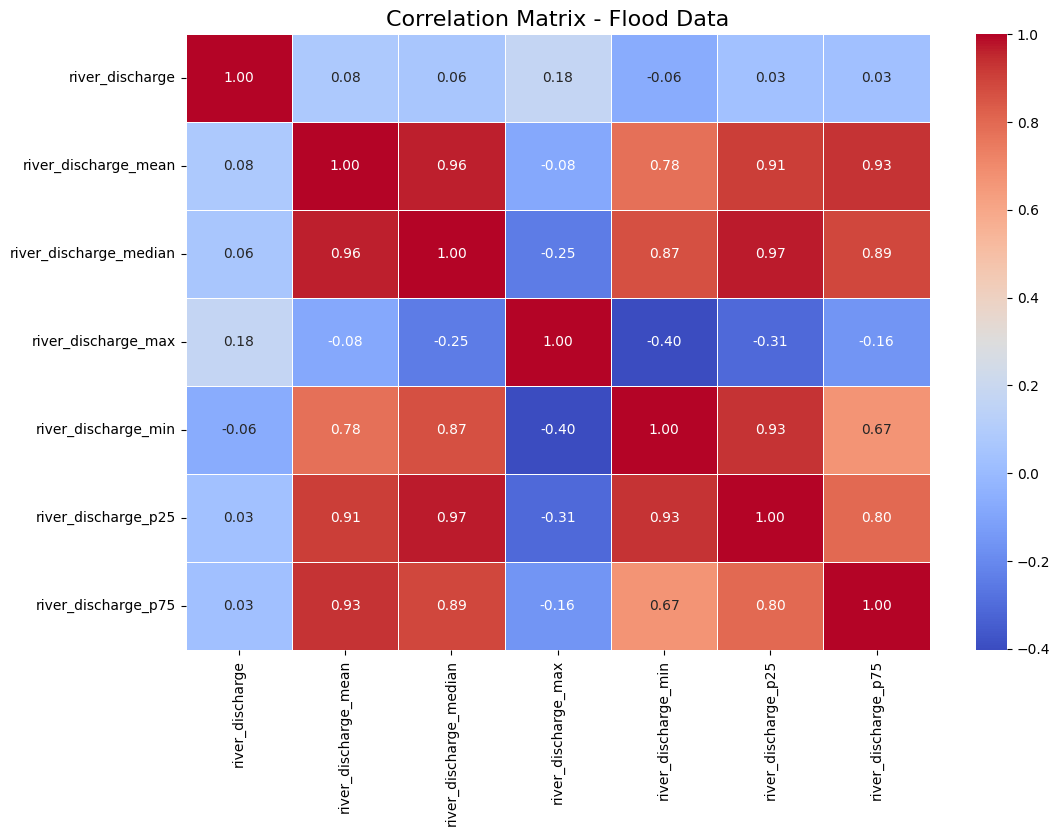

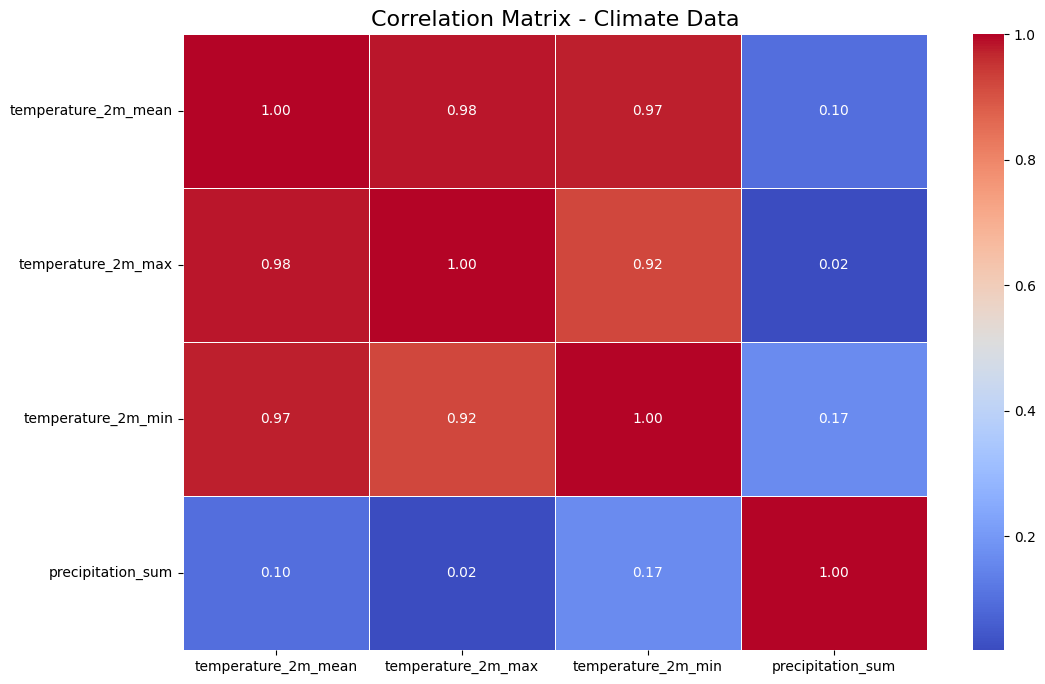

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot correlation heatmap
def plot_correlation_matrix(data, title="Correlation Matrix"):
    # Select only numerical columns for correlation analysis
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Computing the correlation matrix
    correlation_matrix = numerical_data.corr()
    
    # Ploting the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.show()

# Performing correlation analysis for each dataset
for name, data in datasets.items():
    plot_correlation_matrix(data, title=f'Correlation Matrix - {name}')


In [15]:
# Function to perform time series analysis
def plot_time_series(data, time_column, value_column, title="Time Series Analysis"):
    # Ensure 'Date' or time column is in datetime format
    data[time_column] = pd.to_datetime(data[time_column], errors='coerce')
    
    # Plot time series for the given value column
    plt.figure(figsize=(12, 8))
    plt.plot(data[time_column], data[value_column])
    plt.title(title, fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(value_column)
    plt.xticks(rotation=45)
    plt.show()

# Perform time series analysis for each dataset (assuming 'Date' and a numerical column are present)
for name, data in datasets.items():
    if 'Date' in data.columns:
        numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
        for column in numerical_columns:
            plot_time_series(data, 'Date', column, title=f'Time Series - {name} ({column})')


In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Function to perform CDA
def perform_cda(data, target_column, title="Canonical Discriminant Analysis"):
    # Ensure the target column is categorical
    le = LabelEncoder()
    data[target_column] = le.fit_transform(data[target_column])
    
    # Select numerical columns for CDA
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Perform CDA
    X = numerical_data
    y = data[target_column]
    
    lda = LinearDiscriminantAnalysis()
    lda_result = lda.fit_transform(X, y)
    
    # Plot CDA results
    plt.figure(figsize=(8, 6))
    plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y, cmap='coolwarm')
    plt.title(f'{title} - 2D Projection', fontsize=16)
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.show()

# Perform CDA for each dataset (assuming a categorical target column exists)
for name, data in datasets.items():
    # Assume 'Category' is the target column (replace with actual target column name)
    if 'Category' in data.columns:
        perform_cda(data, 'Category', title=f'CDA - {name}')


<Figure size 1200x800 with 0 Axes>

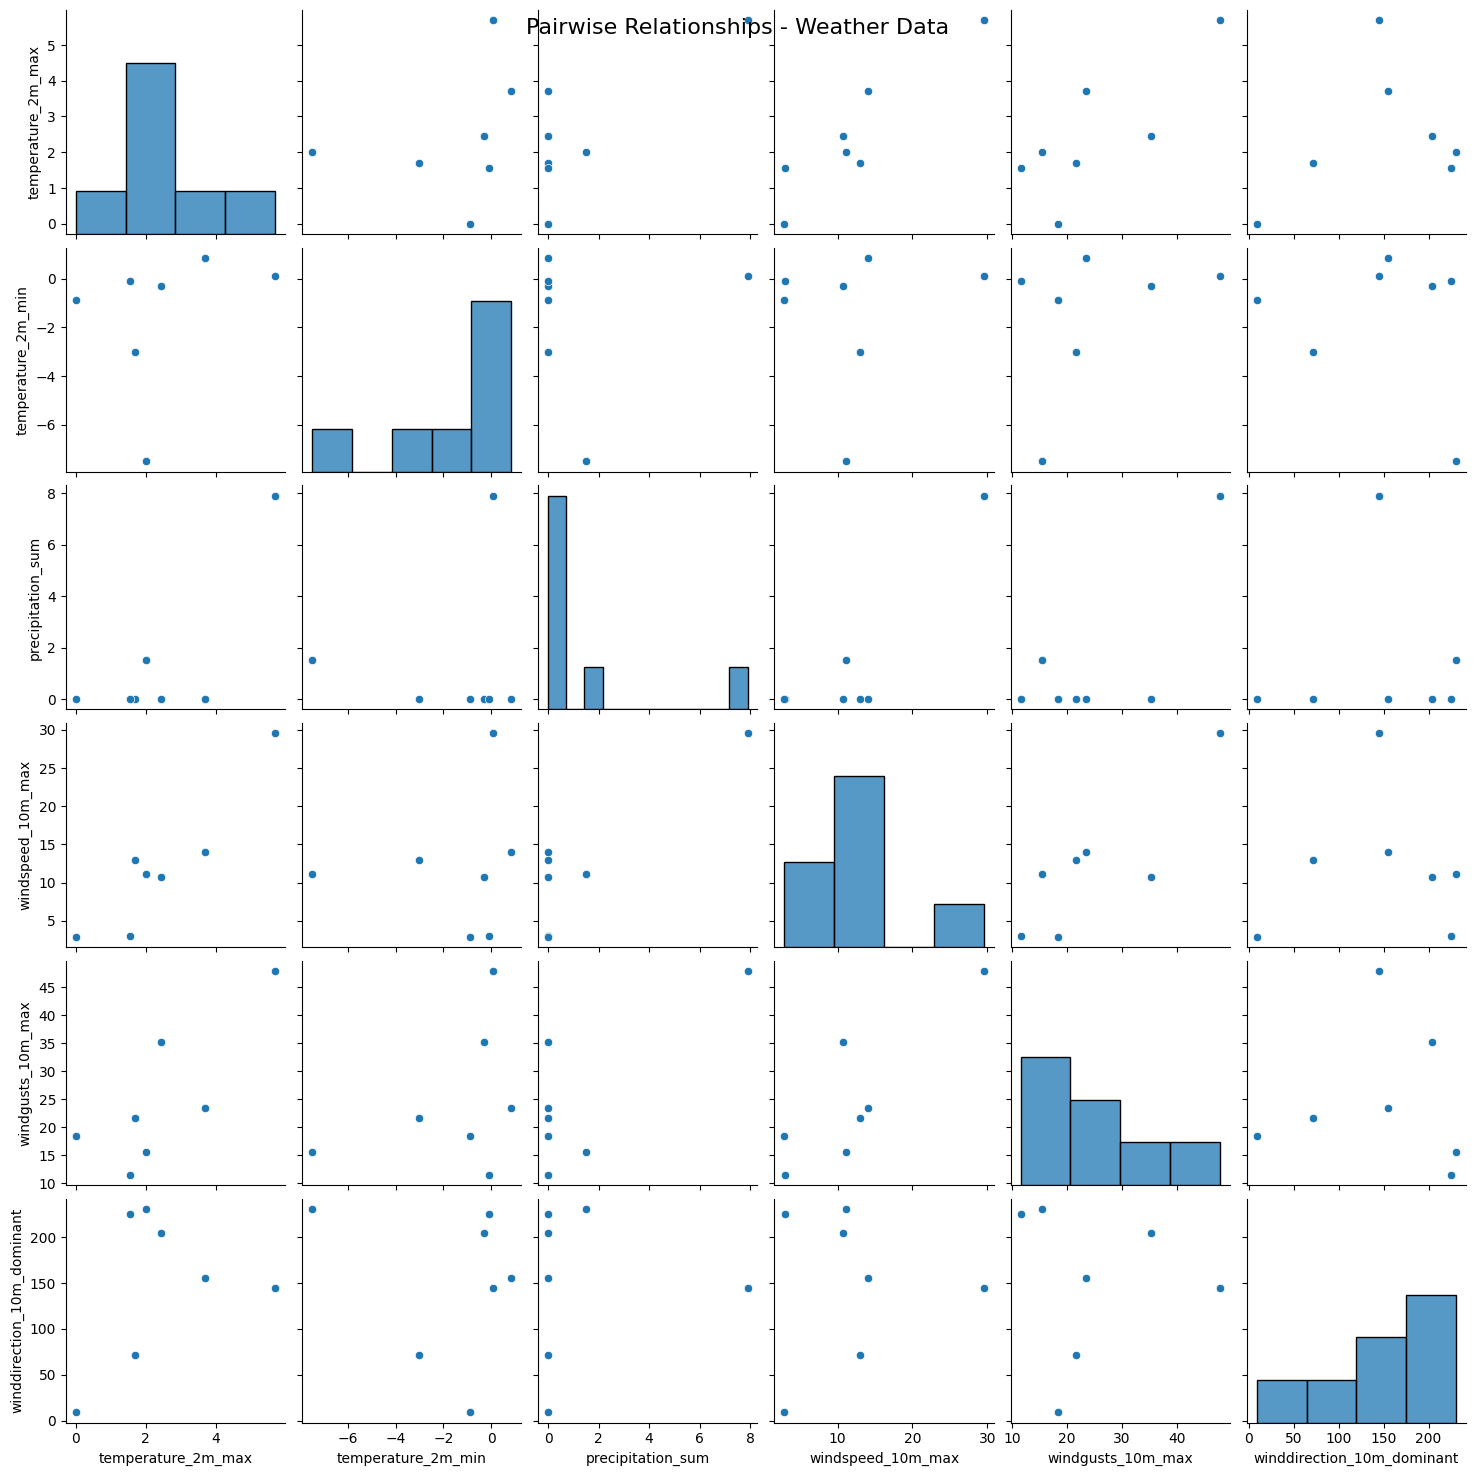

<Figure size 1200x800 with 0 Axes>

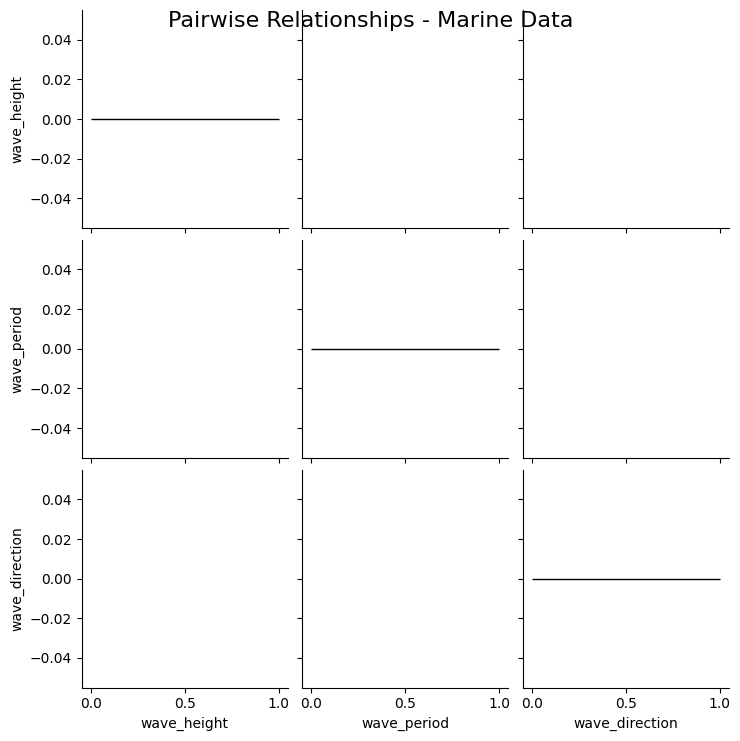

<Figure size 1200x800 with 0 Axes>

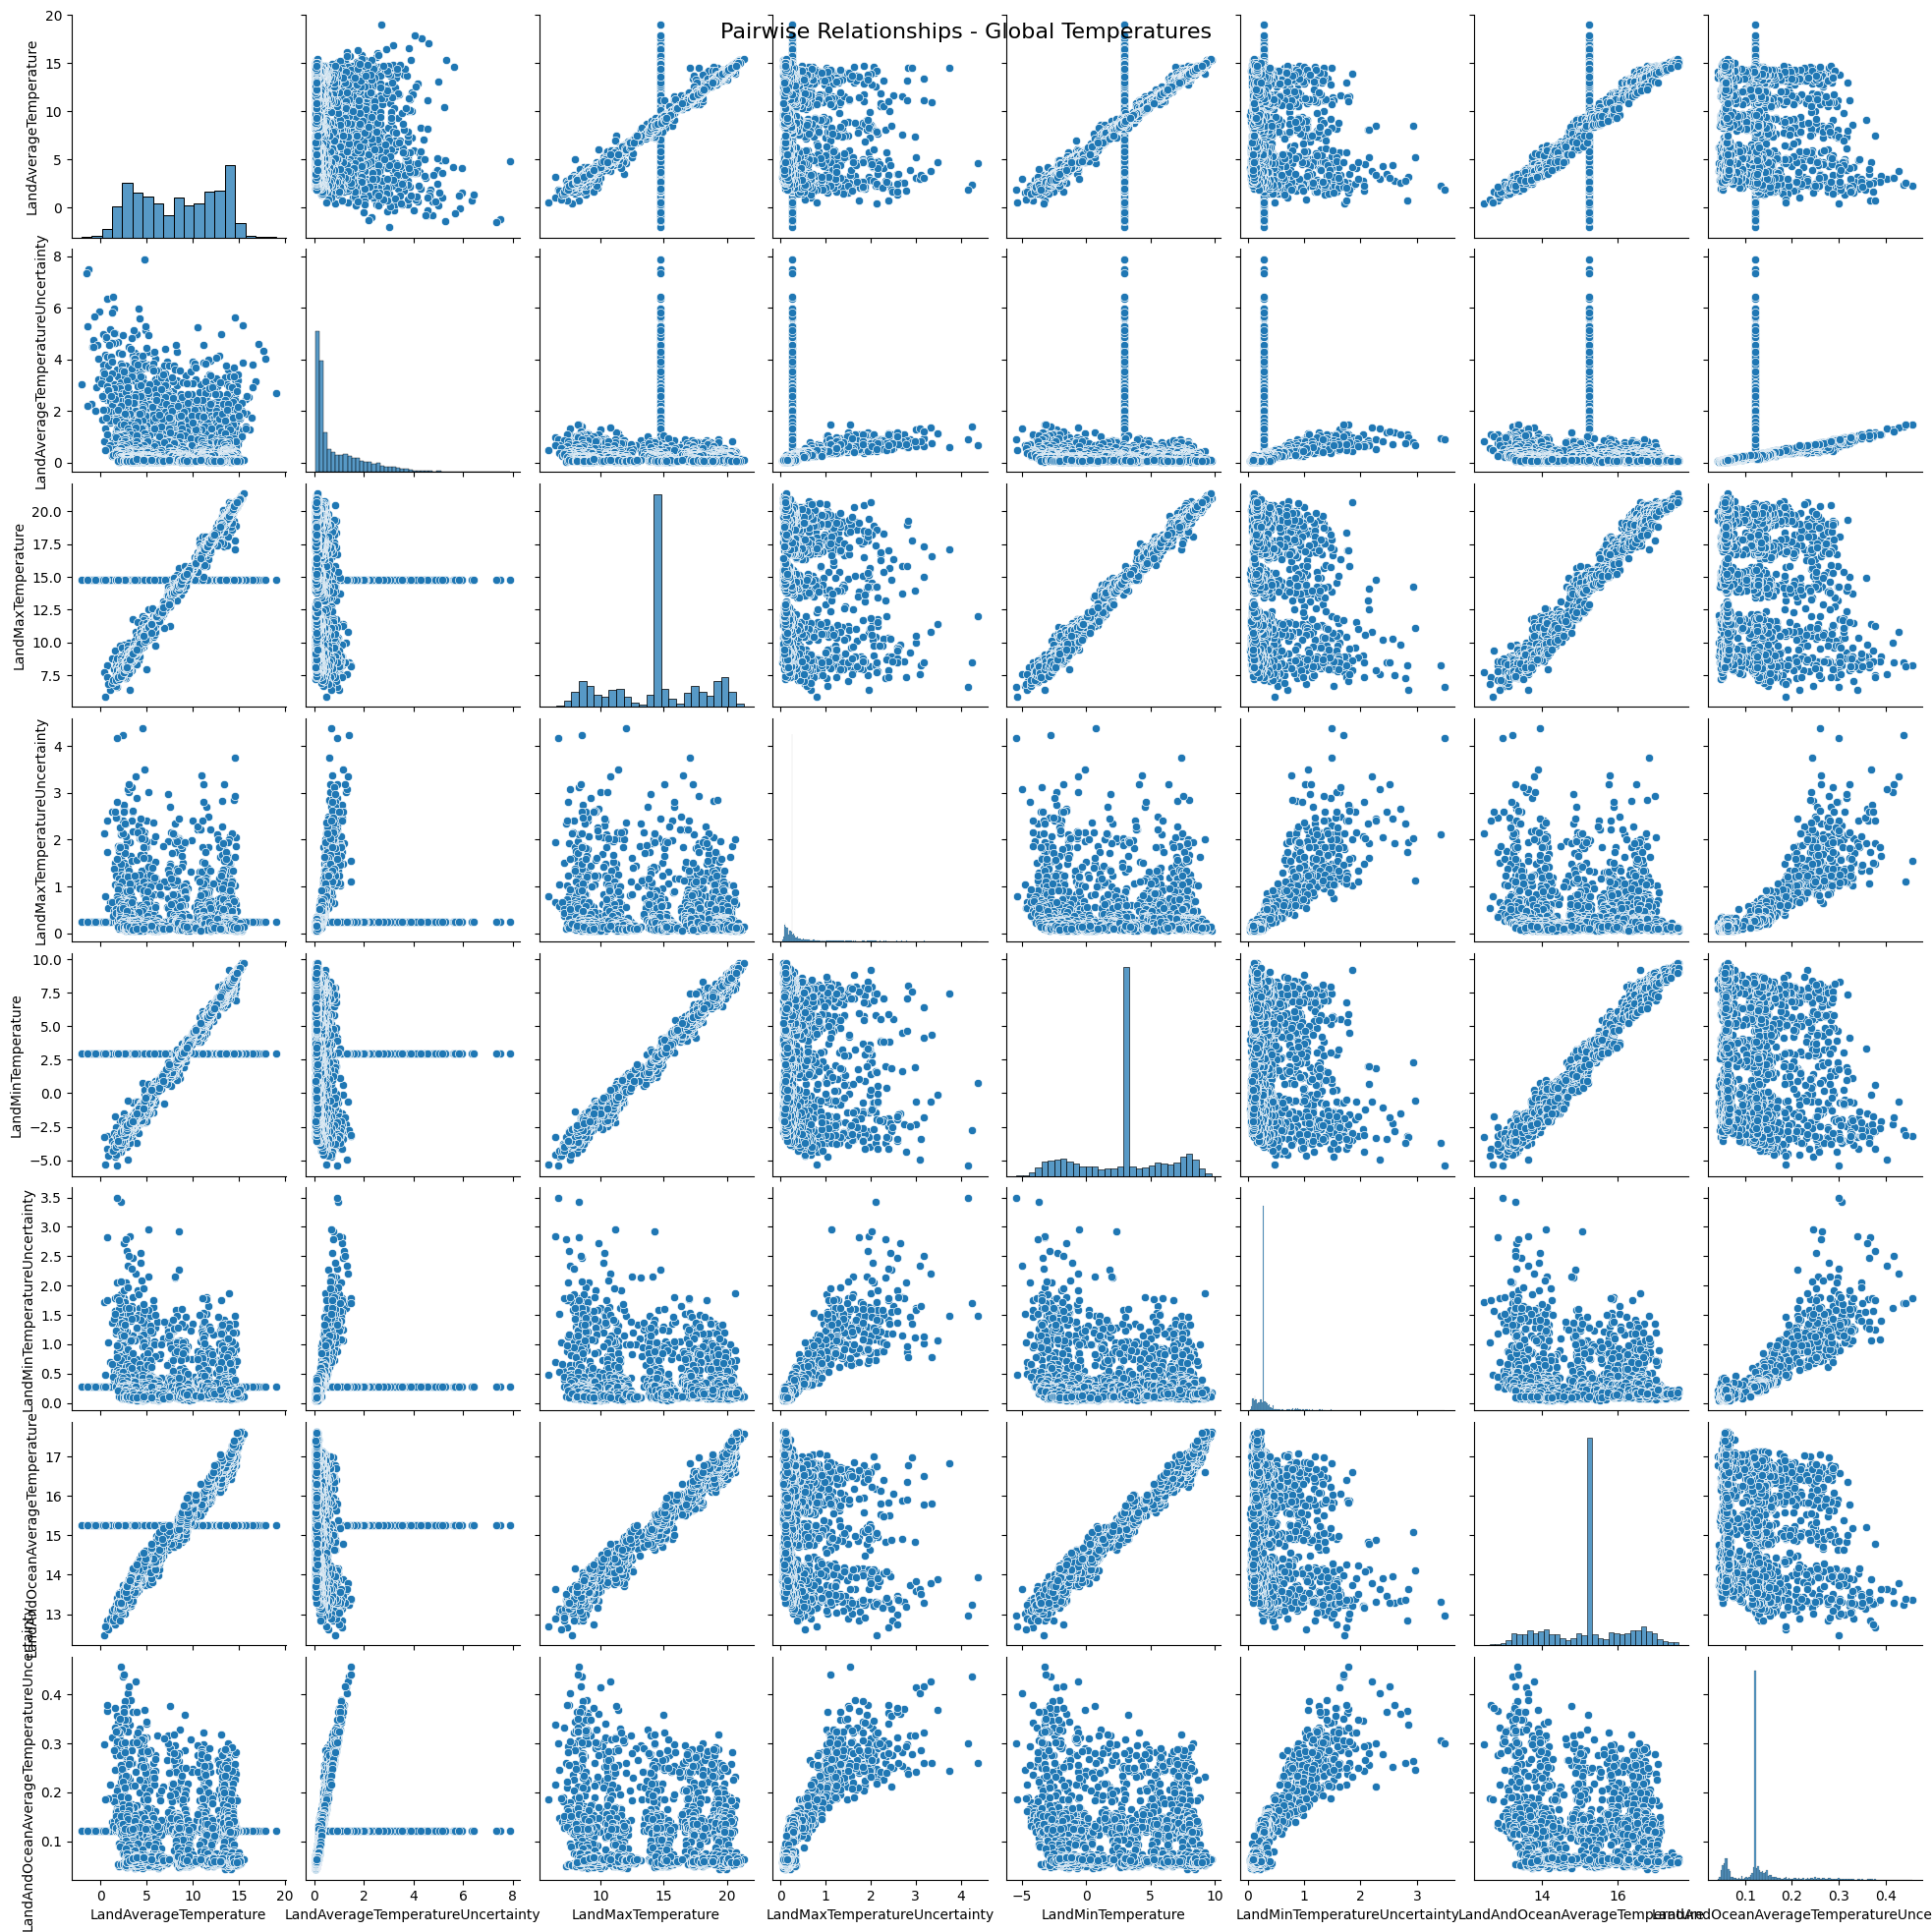

<Figure size 1200x800 with 0 Axes>

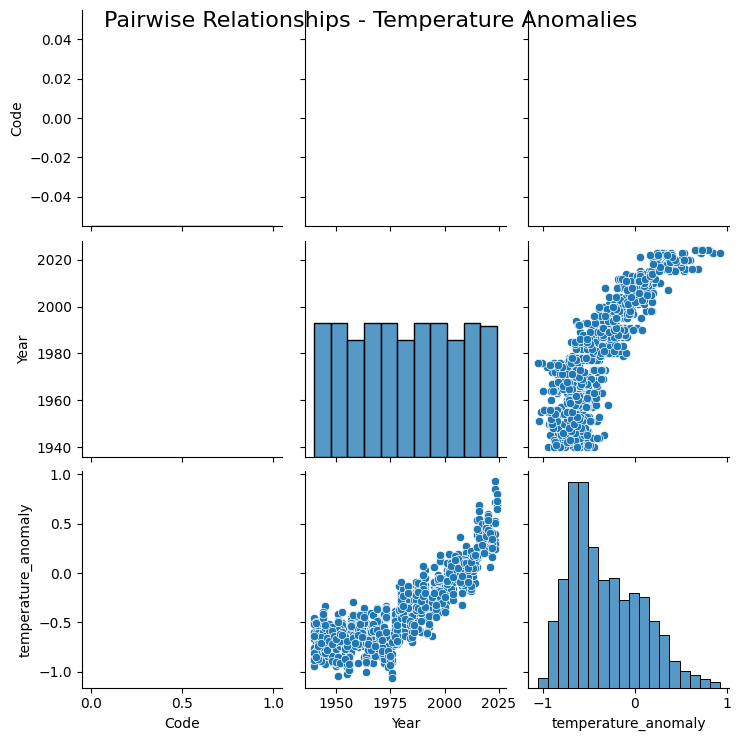

<Figure size 1200x800 with 0 Axes>

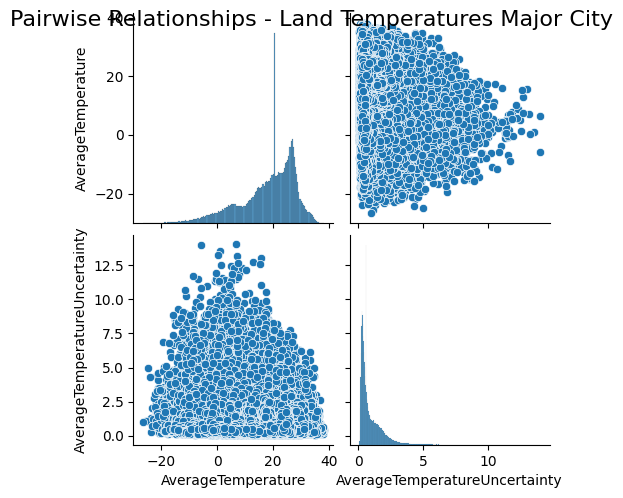

<Figure size 1200x800 with 0 Axes>

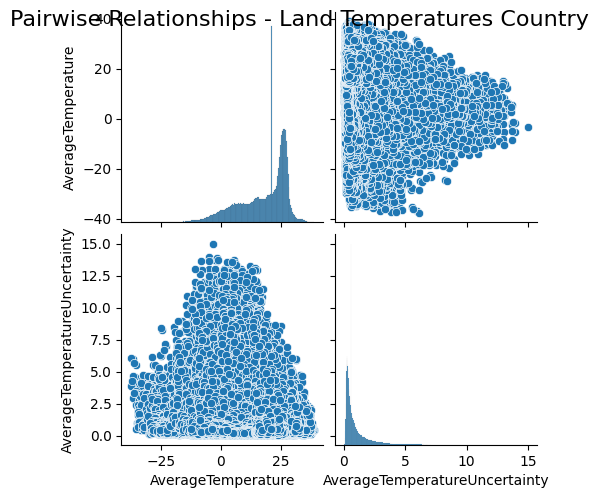

<Figure size 1200x800 with 0 Axes>

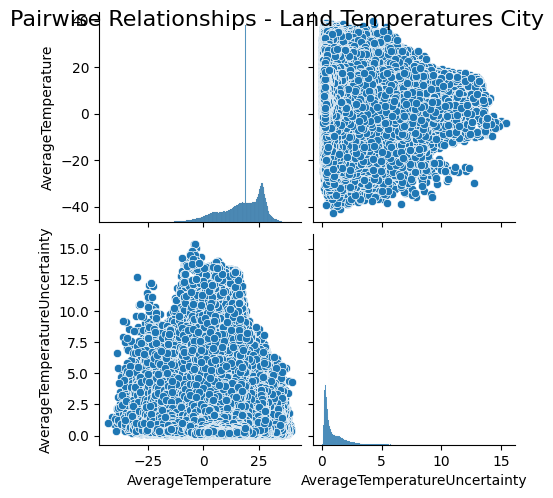

<Figure size 1200x800 with 0 Axes>

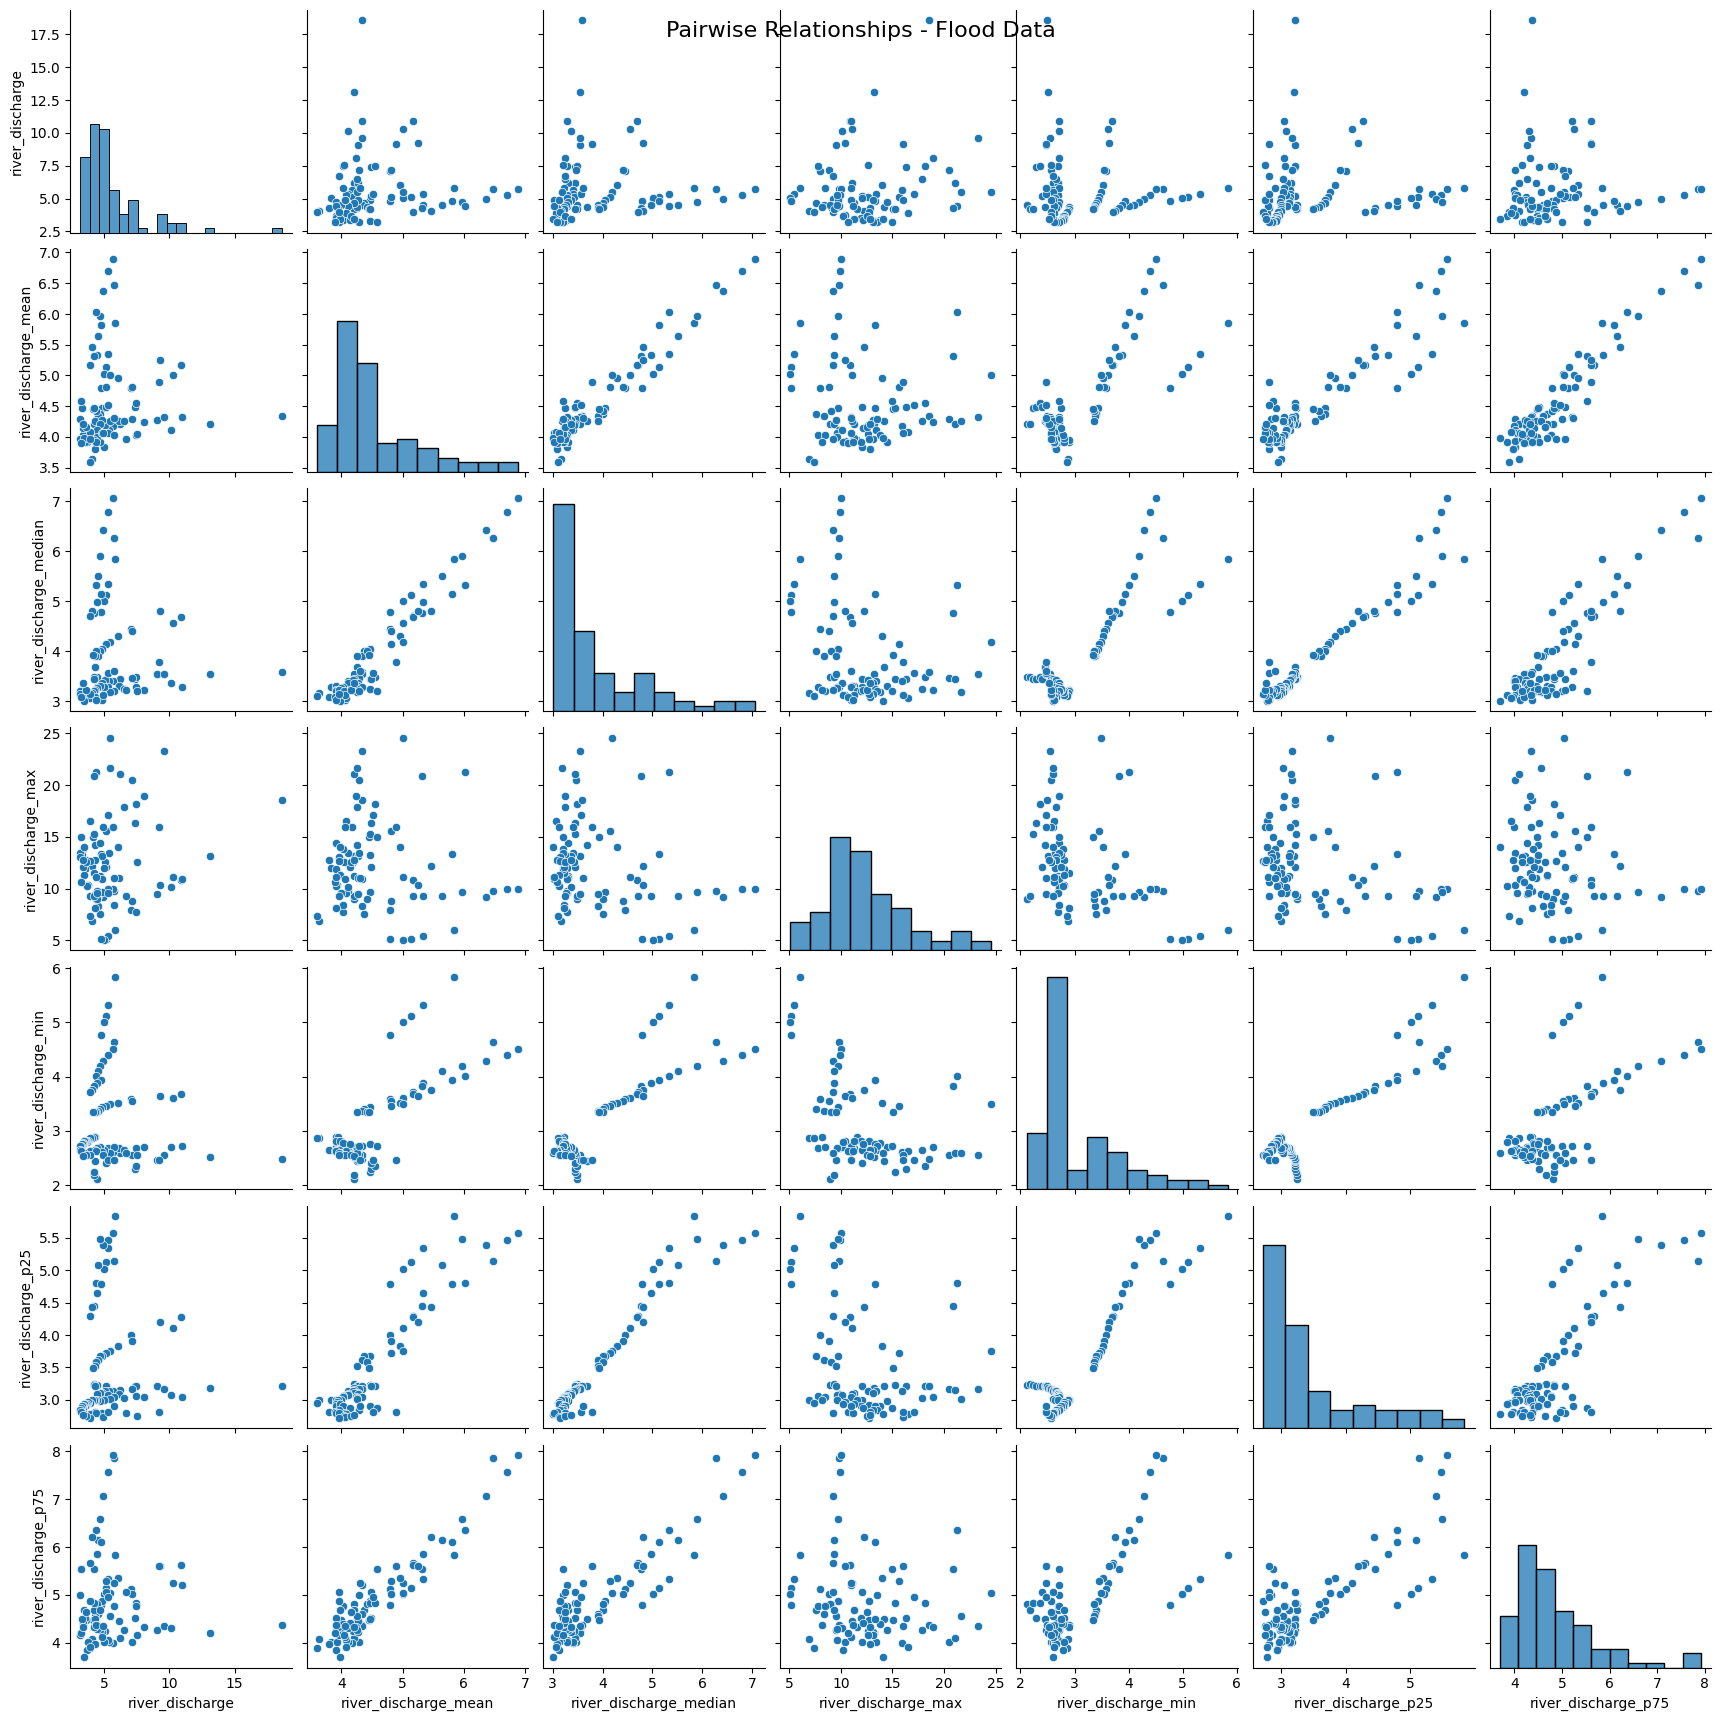

<Figure size 1200x800 with 0 Axes>

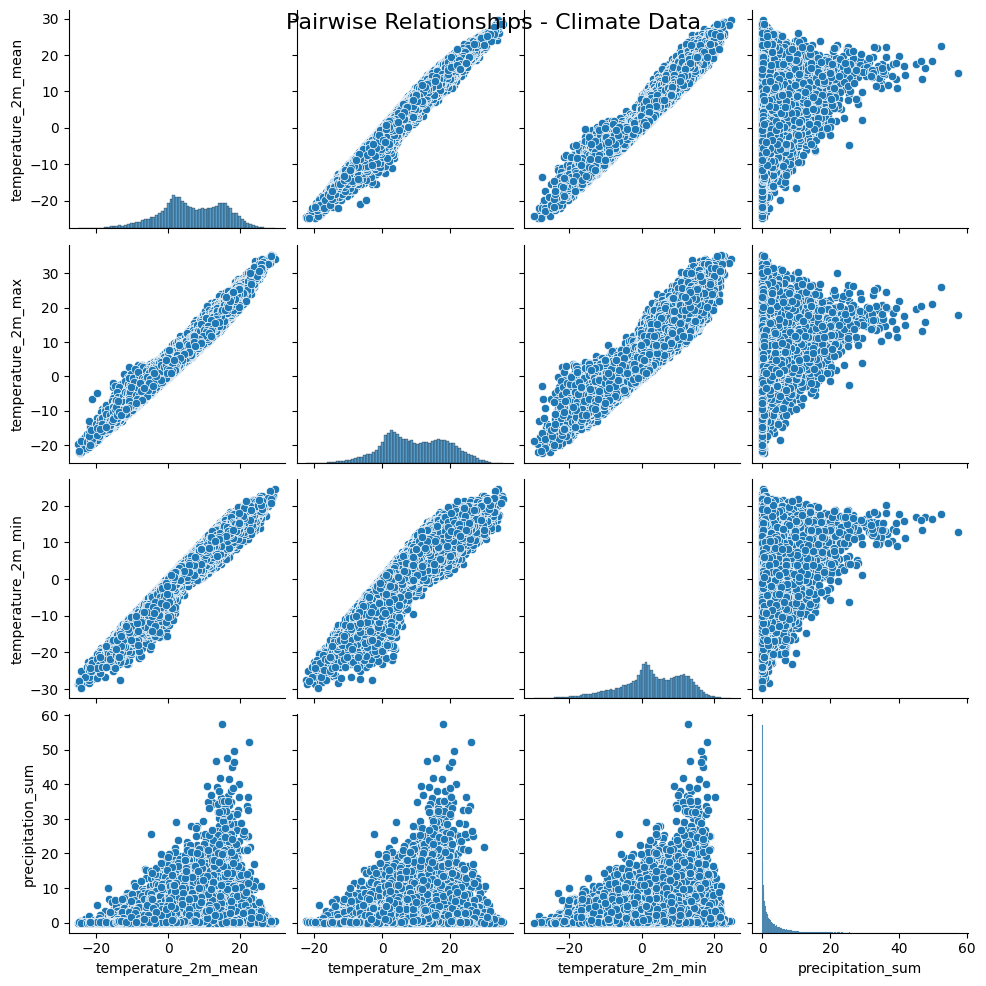

In [17]:
# Pairwise relationships (already covered)
for name, data in datasets.items():
    numerical_data = data.select_dtypes(include=['float64', 'int64'])
    
    if numerical_data.empty:
        print(f"No numerical columns found in {name} for pairplot.")
        continue
    
    plt.figure(figsize=(12, 8))
    sns.pairplot(numerical_data)
    plt.suptitle(f'Pairwise Relationships - {name}', size=16)
    plt.show()


Mean Absolute Error for Temperature Prediction: 0.0012099727791598665


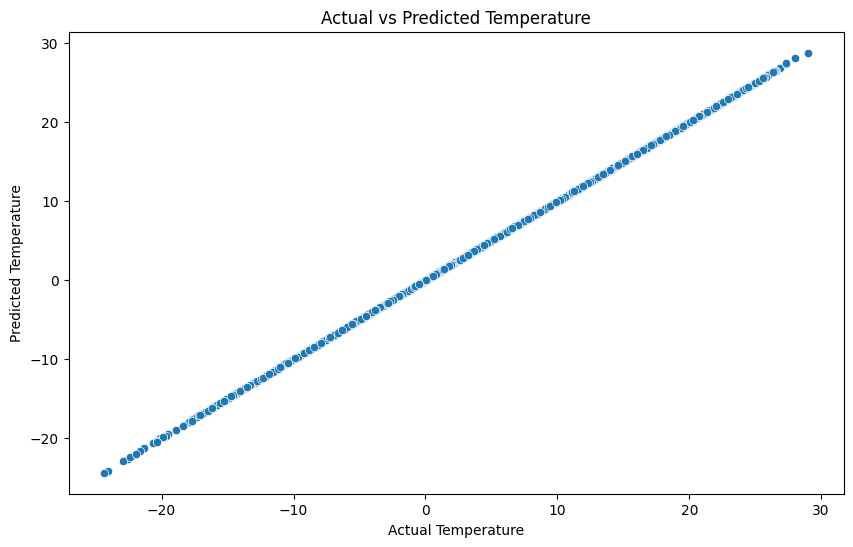

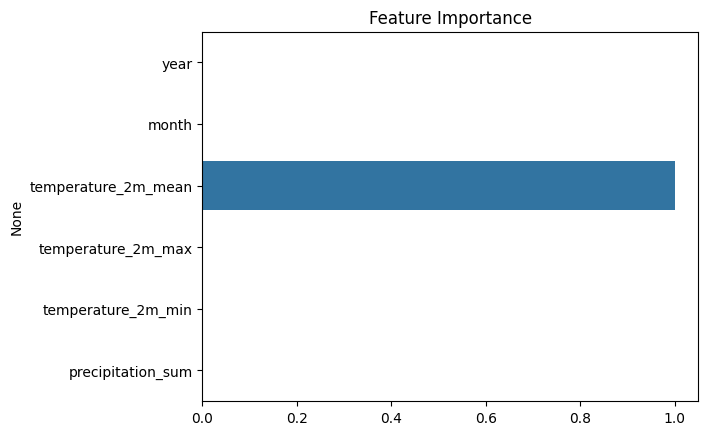

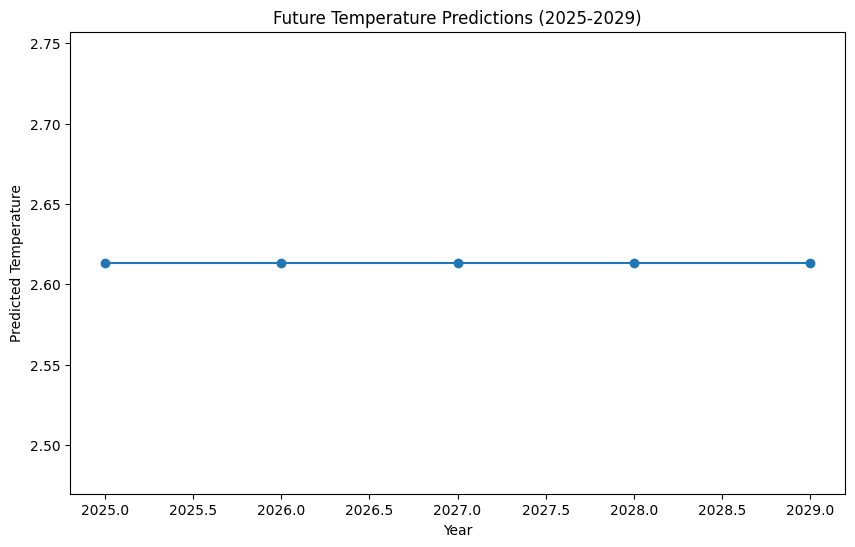

Climate Health Status: Healthy
Suggestions: Continue monitoring and focus on sustainability efforts.


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns



# Preprocessing: Convert 'date' to datetime format
climate_data['date'] = pd.to_datetime(climate_data['date'])
weather_data['date'] = pd.to_datetime(weather_data['date'])
global_temperatures['dt'] = pd.to_datetime(global_temperatures['dt'])

# Extract year and month from the 'date' column for feature engineering
climate_data['year'] = climate_data['date'].dt.year
climate_data['month'] = climate_data['date'].dt.month
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
global_temperatures['year'] = global_temperatures['dt'].dt.year
global_temperatures['month'] = global_temperatures['dt'].dt.month

# Feature selection: We'll use temperature, precipitation, and other relevant columns for prediction
X = climate_data[['year', 'month', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum']]
y = climate_data['temperature_2m_mean']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Temperature Prediction: {mae}")

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

# Plot Feature Importance
feature_importance = model.feature_importances_
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()

# Predict future temperature (for the next 5 years)
future_years = pd.DataFrame({'year': [2025, 2026, 2027, 2028, 2029],
                             'month': [1, 1, 1, 1, 1],
                             'temperature_2m_mean': [None] * 5,
                             'temperature_2m_max': [None] * 5,
                             'temperature_2m_min': [None] * 5,
                             'precipitation_sum': [None] * 5})
future_temperature_predictions = model.predict(future_years[['year', 'month', 'temperature_2m_mean', 'temperature_2m_max', 'temperature_2m_min', 'precipitation_sum']])

# Visualize future temperature predictions
plt.figure(figsize=(10, 6))
plt.plot([2025, 2026, 2027, 2028, 2029], future_temperature_predictions, marker='o')
plt.title('Future Temperature Predictions (2025-2029)')
plt.xlabel('Year')
plt.ylabel('Predicted Temperature')
plt.show()

# Climate Health Estimation
climate_health = "Healthy"
if future_temperature_predictions[-1] - future_temperature_predictions[0] > 2:
    climate_health = "Unhealthy"
elif future_temperature_predictions[-1] - future_temperature_predictions[0] > 4:
    climate_health = "Critical"

print(f"Climate Health Status: {climate_health}")

# Suggestions based on Climate Health
if climate_health == "Healthy":
    print("Suggestions: Continue monitoring and focus on sustainability efforts.")
elif climate_health == "Unhealthy":
    print("Suggestions: Take action to reduce emissions, invest in renewable energy, and promote climate adaptation strategies.")
else:
    print("Suggestions: Immediate action required to address climate emergency. Focus on carbon reduction, renewable energy, and large-scale adaptation measures.")


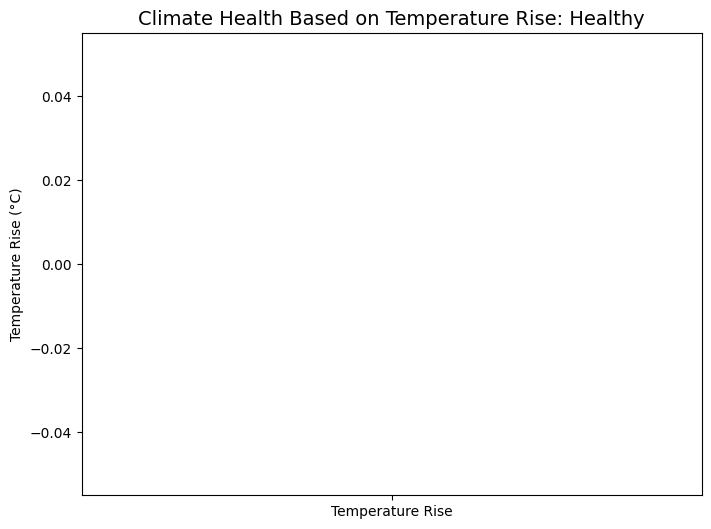

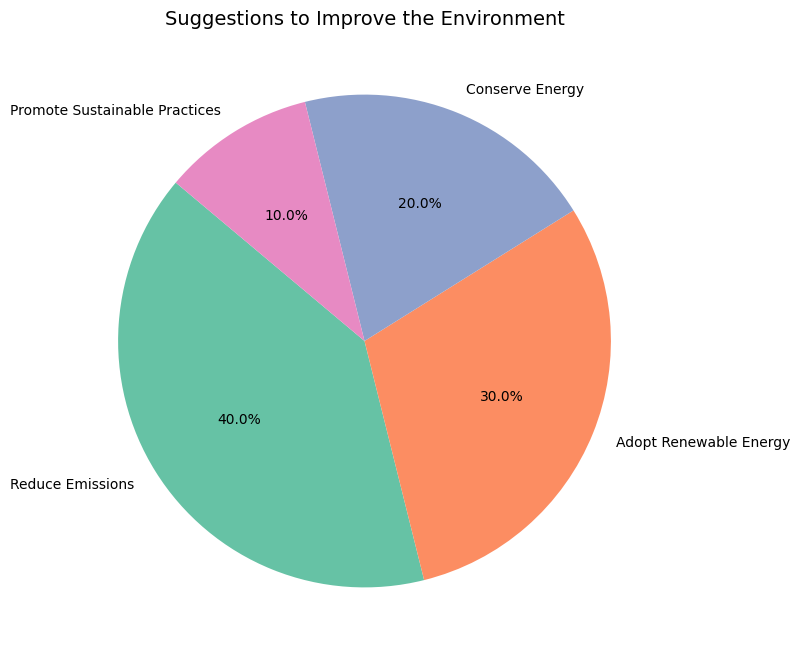

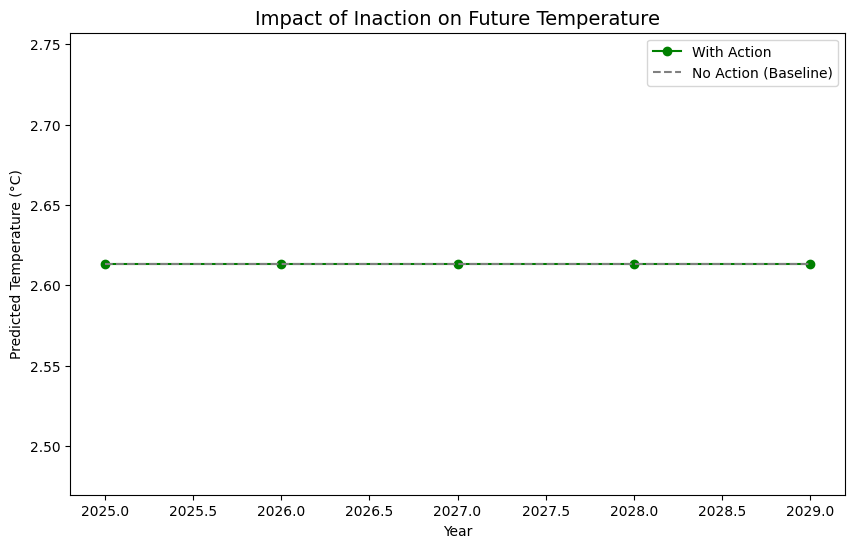

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Climate Health Visualization
# Create a bar plot to show the temperature rise and corresponding climate health
temperature_rise = future_temperature_predictions[-1] - future_temperature_predictions[0]
climate_health = "Healthy"
if temperature_rise > 2:
    climate_health = "Unhealthy"
if temperature_rise > 4:
    climate_health = "Critical"

# Plotting the climate health based on temperature rise
plt.figure(figsize=(8, 6))
sns.barplot(x=["Temperature Rise"], y=[temperature_rise], palette="coolwarm")
plt.title(f"Climate Health Based on Temperature Rise: {climate_health}", fontsize=14)
plt.ylabel("Temperature Rise (°C)")
plt.show()

# 2. Suggestions for Action
# Pie chart showing possible actions to improve the environment
actions = ['Reduce Emissions', 'Adopt Renewable Energy', 'Conserve Energy', 'Promote Sustainable Practices']
action_values = [40, 30, 20, 10]

plt.figure(figsize=(8, 8))
plt.pie(action_values, labels=actions, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Suggestions to Improve the Environment", fontsize=14)
plt.show()

# 3. Impact of Inaction (Temperature rise without action)
# Simulating a scenario where no action is taken and temperature continues to rise
future_temperature_no_action = future_temperature_predictions[-1] + (temperature_rise * 0.5)  # Exaggerated rise if no action

plt.figure(figsize=(10, 6))
plt.plot([2025, 2026, 2027, 2028, 2029], future_temperature_predictions, label="With Action", marker='o', color='green')
plt.plot([2025, 2026, 2027, 2028, 2029], [future_temperature_predictions[0]] * 5, linestyle="--", color="gray", label="No Action (Baseline)")
plt.title("Impact of Inaction on Future Temperature", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.show()
